In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns 
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.stats import sem
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# This table has the desciption and name of all the data files
Index = pd.read_csv('/content/drive/My Drive/HNC/Data/Index_Sheet.csv')
Index.head(30)

,Parameter name,Description
0,00_reference:R-vs-NR,Information on whether patient was replanned o...
1,00_reference:R-fractions,Should have been replanned
2,xmin,Distances between each PTV contour point to ea...
3,xmin_slope,Rate of change of xmin over time (fractions).
4,xmin_resultant-vector,Vector associated for each calculated x_min is...
5,xmin_line-segments_CoM,The line segments associated for each calculat...
6,xmin_line-segments_limits,The line segments associated for each calculat...
7,xmed,Calculation is similar to xmin but using the m...
8,xmed_slope,Rate of change of xmed over time (fractions).
9,xave,Calculation is similar to xmin but using the a...


In [ ]:
# Code for creating the master table
sheets = Index.loc[:,'Parameter name']
master = pd.read_csv('/content/drive/My Drive/HNC/Data/Master_sheet.csv', index_col = "patient_num")
patients = pd.read_csv('/content/drive/My Drive/HNC/Data/Patient_sheet.csv', index_col = "patient_num")
count =0
x=0
for sheet in sheets:
  table = pd.read_csv(f'/content/drive/My Drive/HNC/Data/{sheet}.csv', index_col = "patient_num")
  if sheet == 'treatment-info':
    table.drop(table.iloc[:,12:], axis=1, inplace=True)
  for num in patients.index:
    if num in table.index:
      if num in master.index:
        for col in table.columns:
          master.at[num,col] = table.at[num,col]
      else:
        row = table.loc[table.index == num]
        master = pd.concat((master,row),axis=0)
master.head(70)

,replanned_or_not,R_fx,R_fx-determined,R-vs-SHBR,BODY,Body-1,Body-2,Body-3,Body-4,Body-5,...,neck_area_fx-26,neck_area_fx-27,neck_area_fx-28,neck_area_fx-29,neck_area_fx-30,neck_area_fx-31,neck_area_fx-32,neck_area_fx-33,neck_area_fx-34,neck_area_fx-35
patient_num,,,,,,,,,,,,,,,,,,,,,
19,R,21.0,15.0,r,21.484754,20.805747,NaN,NaN,NaN,NaN,...,NaN,NaN,62.0672,NaN,59.0119,NaN,59.6073,NaN,NaN,NaN
35,R,26.0,20.0,r,18.636867,21.230902,NaN,19.124266,NaN,NaN,...,69.6107,NaN,68.9219,NaN,NaN,68.8933,NaN,NaN,67.8577,NaN
115,R,12.0,12.0,shbr,21.957419,21.883293,NaN,NaN,22.405124,NaN,...,62.7572,NaN,61.3708,NaN,NaN,60.8830,NaN,62.6707,NaN,NaN
272,R,25.0,19.0,r,22.138647,20.795968,NaN,NaN,NaN,NaN,...,NaN,62.0832,NaN,NaN,NaN,60.9116,NaN,60.0142,NaN,NaN
447,R,23.0,19.0,r,19.842300,21.966858,NaN,NaN,21.909313,21.018438,...,NaN,NaN,NaN,NaN,NaN,NaN,57.2289,NaN,NaN,NaN
454,R,12.0,3.0,r,18.654211,21.544479,NaN,NaN,20.289924,NaN,...,51.0775,NaN,NaN,49.6320,NaN,50.1669,NaN,NaN,50.4988,NaN
459,R,11.0,4.0,r,17.830397,19.535757,NaN,NaN,21.031937,NaN,...,NaN,70.4574,NaN,NaN,72.9760,NaN,68.6870,NaN,69.2576,NaN
462,R,22.0,15.0,r,21.230545,21.392956,NaN,NaN,20.808668,NaN,...,NaN,NaN,71.2937,72.2705,NaN,72.4394,NaN,NaN,NaN,NaN
77,R,5.0,5.0,shbr,26.214393,24.567081,NaN,24.080280,NaN,23.948464,...,53.8805,NaN,NaN,52.6855,NaN,52.9359,NaN,NaN,51.8423,NaN


In [ ]:
cols = master.columns.tolist()
list(enumerate(cols))

[(0, 'replanned_or_not'),
 (1, 'R_fx'),
 (2, 'R_fx-determined'),
 (3, 'R-vs-SHBR'),
 (4, 'BODY'),
 (5, 'Body-1'),
 (6, 'Body-2'),
 (7, 'Body-3'),
 (8, 'Body-4'),
 (9, 'Body-5'),
 (10, 'Body-6'),
 (11, 'Body-7'),
 (12, 'Body-8'),
 (13, 'Body-9'),
 (14, 'Body-10'),
 (15, 'Body-11'),
 (16, 'Body-12'),
 (17, 'Body-13'),
 (18, 'Body-14'),
 (19, 'Body-15'),
 (20, 'Body-16'),
 (21, 'Body-17'),
 (22, 'Body-18'),
 (23, 'Body-19'),
 (24, 'Body-20'),
 (25, 'Body-21'),
 (26, 'Body-22'),
 (27, 'Body-23'),
 (28, 'Body-24'),
 (29, 'Body-25'),
 (30, 'Body-26'),
 (31, 'xmin-slope_Body-1'),
 (32, 'xmin-slope_Body-2'),
 (33, 'xmin-slope_Body-3'),
 (34, 'xmin-slope_Body-4'),
 (35, 'xmin-slope_Body-5'),
 (36, 'xmin-slope_Body-6'),
 (37, 'xmin-slope_Body-7'),
 (38, 'xmin-slope_Body-8'),
 (39, 'xmin-slope_Body-9'),
 (40, 'xmin-slope_Body-10'),
 (41, 'xmin-slope_Body-11'),
 (42, 'xmin-slope_Body-12'),
 (43, 'xmin-slope_Body-13'),
 (44, 'xmin-slope_Body-14'),
 (45, 'xmin-slope_Body-15'),
 (46, 'xmin-slope_Body

In [ ]:
master.to_csv("Master_file")

xmin: Distances between each PTV contour point to each body contour points are calculated and the minimum is found.
This value is calculated for each fraction of one patient.


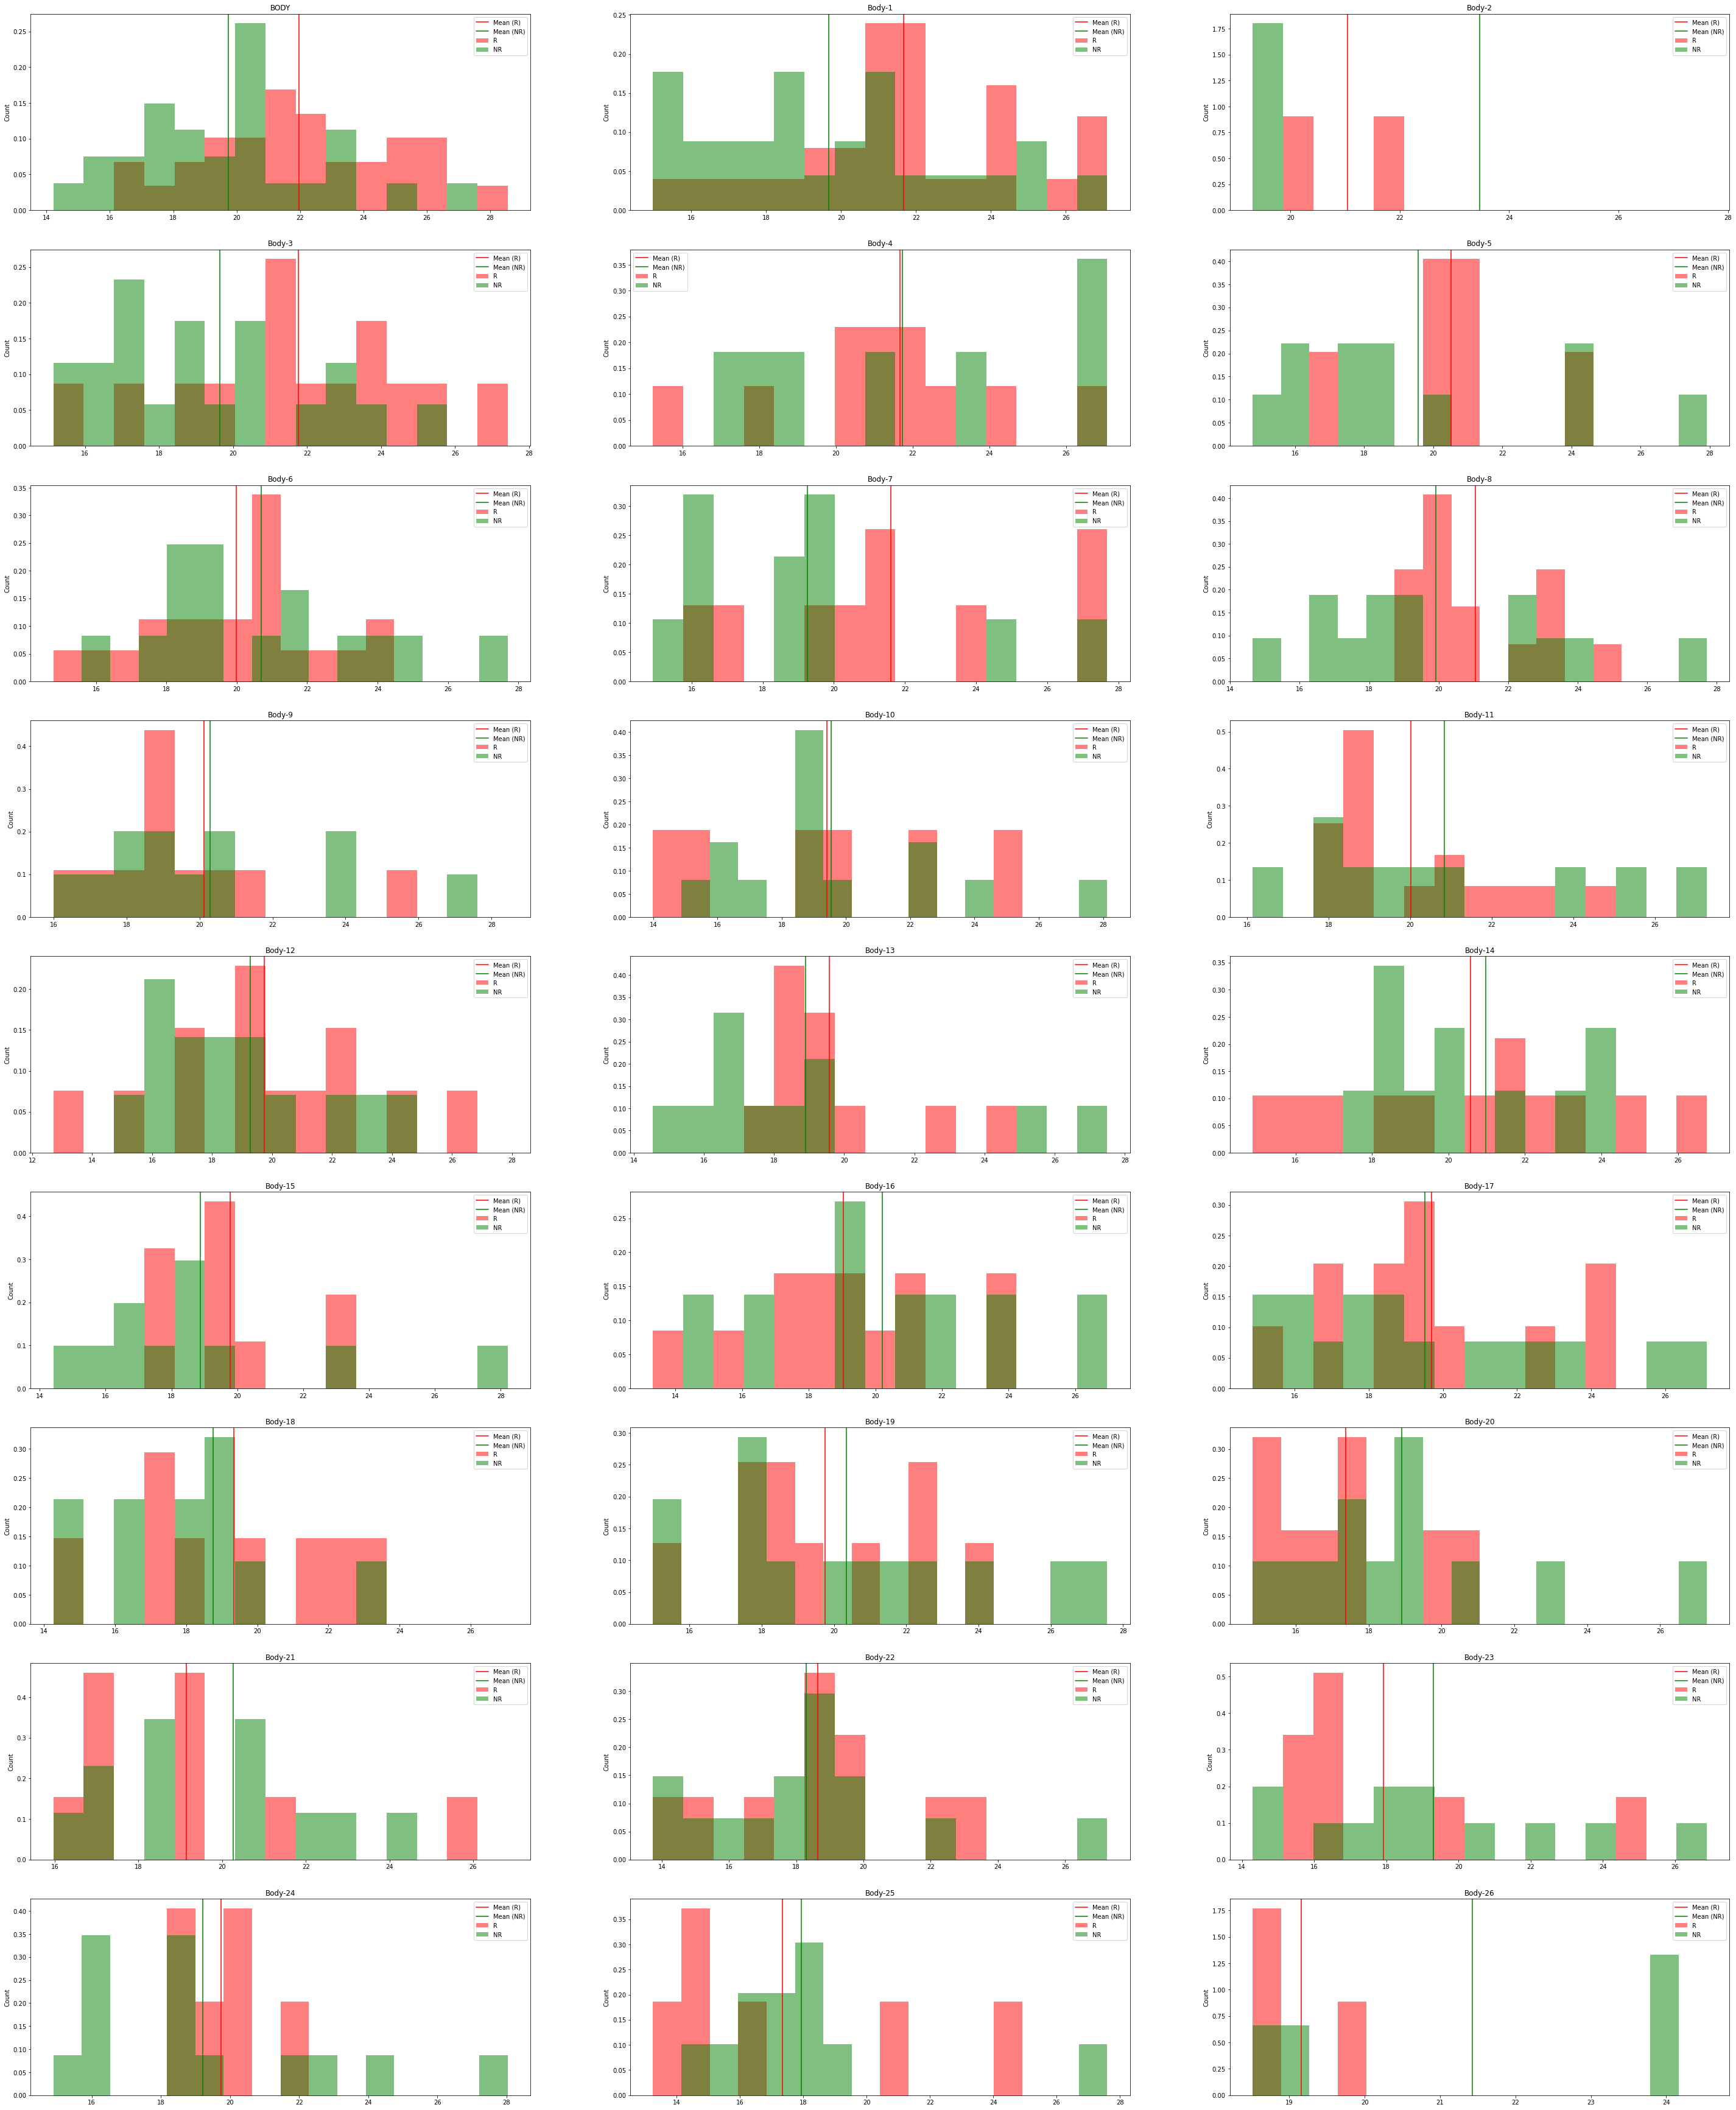

In [ ]:
# Normalized Y-axis

R = master[master['replanned_or_not']=='R']
NR = master[master['replanned_or_not']=='NR']
plt.figure(figsize = (50,70))
print(Index.iloc[2,0]+": "+Index.iloc[2,1])
for i in enumerate(cols[4:31]):
  if R[i[1]].dtype == 'object':
    continue
  data = pd.concat([R[i[1]].dropna(), NR[i[1]].dropna()])
  data_min, data_max = min(data), max(data)
  xlim = (data_min, data_max)
  width = (data_max - data_min)/15
  bins = np.arange(xlim[0],xlim[-1]+width,float(width))
  plt.subplot(((len(cols[4:31])/3)+1),3,i[0]+1)
  plt.hist(R[i[1]].dropna() , color='red', bins =bins, label='R', alpha=0.5, density=True)
  plt.hist(NR[i[1]].dropna() , color='green', bins =bins, label='NR', alpha=0.5, density=True)
  plt.title(f"{i[1]}")
  plt.axvline(R[i[1]].mean(),color="red",label = 'Mean (R)')
  plt.axvline(NR[i[1]].mean(),color="green",label = 'Mean (NR)')
  plt.ylabel("Count")
  plt.legend()

xmin_slope: Rate of change of xmin over time (fractions).


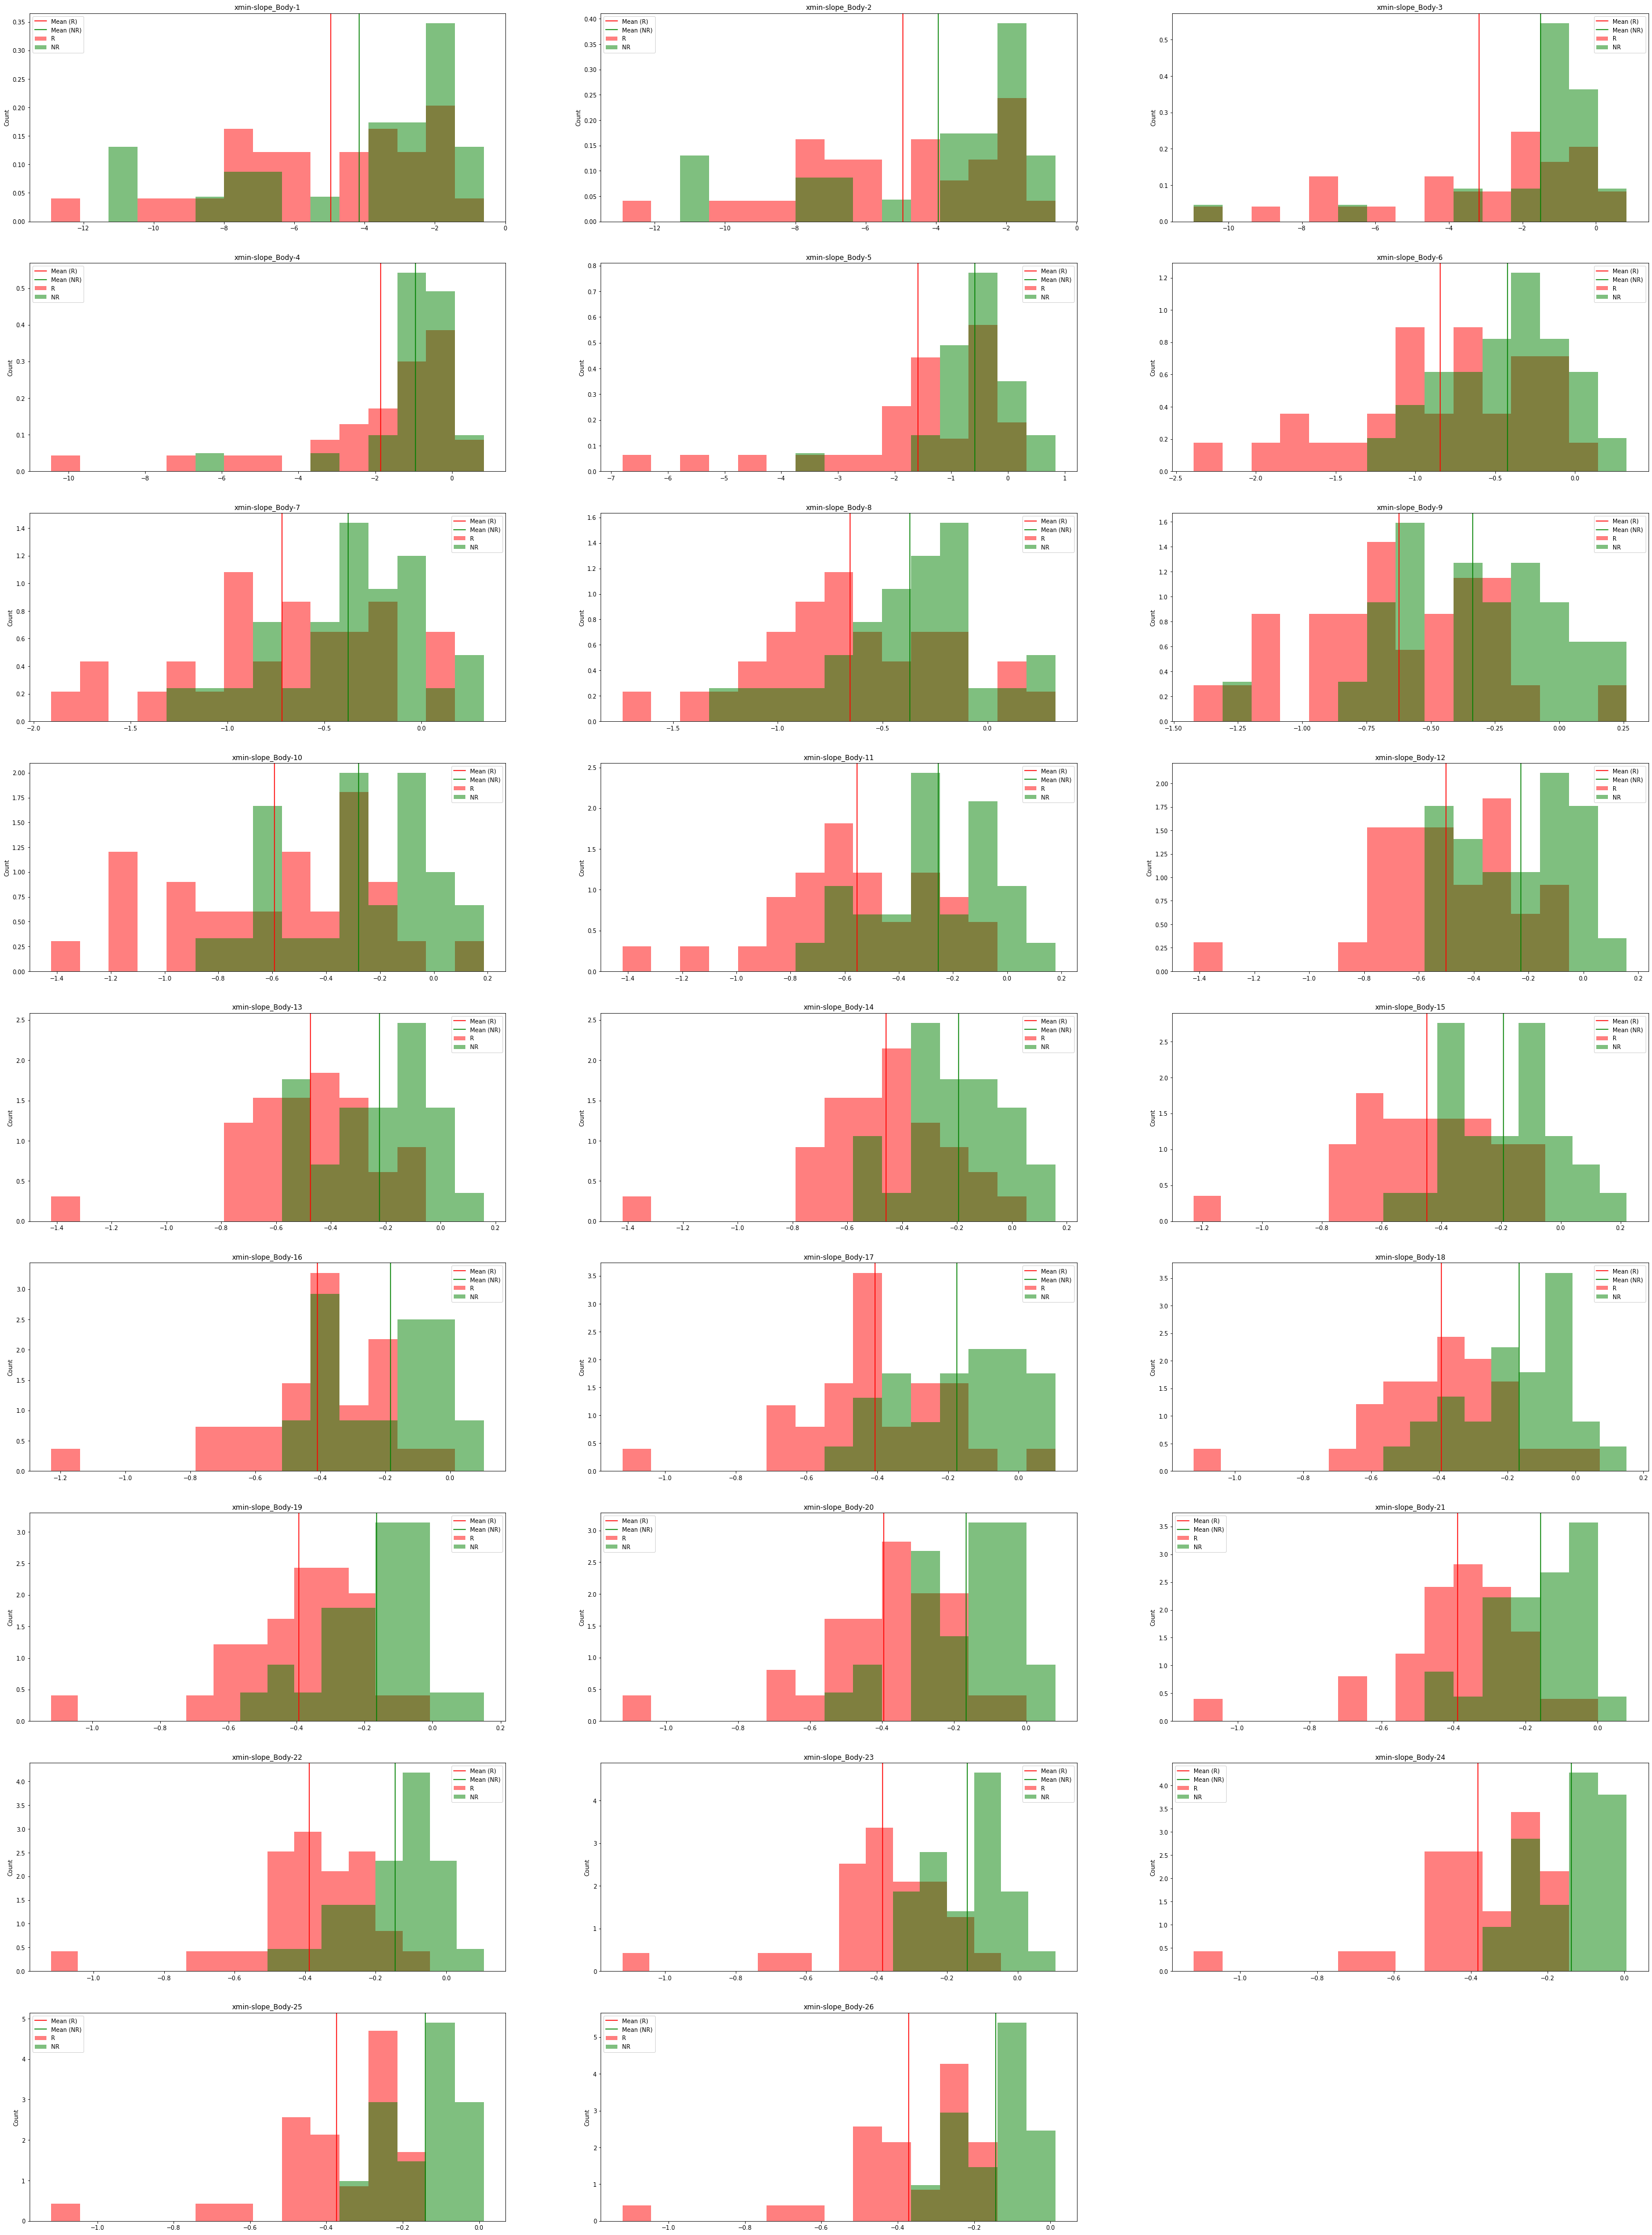

In [ ]:
R = master[master['replanned_or_not']=='R']
NR = master[master['replanned_or_not']=='NR']
plt.figure(figsize = (50,70))
print(Index.iloc[3,0]+": "+Index.iloc[3,1])
for i in enumerate(cols[31:57]):
  if R[i[1]].dtype == 'object':
    continue
  data = pd.concat([R[i[1]].dropna(), NR[i[1]].dropna()])
  data_min, data_max = min(data), max(data)
  xlim = (data_min, data_max)
  width = (data_max - data_min)/15
  bins = np.arange(xlim[0],xlim[-1]+width,float(width))
  plt.subplot(((len(cols[31:57])/3)+1),3,i[0]+1)
  plt.hist(R[i[1]].dropna() , color='red', bins =bins, label='R', alpha=0.5, density=True)
  plt.hist(NR[i[1]].dropna() , color='green', bins =bins, label='NR', alpha=0.5, density=True)
  plt.title(f"{i[1]}")
  plt.axvline(R[i[1]].mean(),color="red",label = 'Mean (R)')
  plt.axvline(NR[i[1]].mean(),color="green",label = 'Mean (NR)')
  plt.ylabel("Count")
  plt.legend()

xmin_resultant-vector: Vector associated for each calculated x_min is summed across all available fractions for one patient.
Each resultant vector has a given cartesian (x, y, z) and spherical coordinates (ρ, θ, φ).


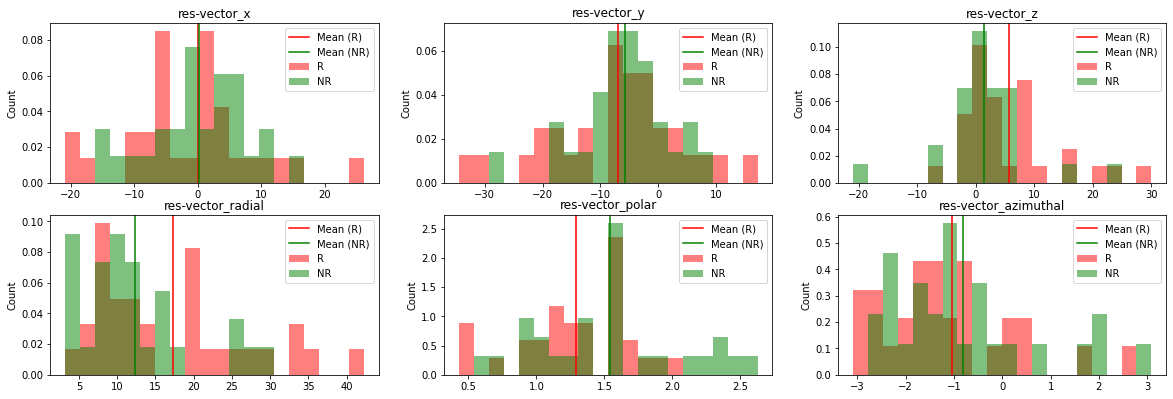

In [ ]:
R = master[master['replanned_or_not']=='R']
NR = master[master['replanned_or_not']=='NR']
plt.figure(figsize = (20,10))
print(Index.iloc[4,0]+": "+Index.iloc[4,1])
for i in enumerate(cols[57:63]):
  if R[i[1]].dtype == 'object':
    continue
  data = pd.concat([R[i[1]].dropna(), NR[i[1]].dropna()])
  data_min, data_max = min(data), max(data)
  xlim = (data_min, data_max)
  width = (data_max - data_min)/20
  bins = np.arange(xlim[0],xlim[-1]+width,float(width))
  plt.subplot(((len(cols[57:63])/3)+1),3,i[0]+1)
  plt.hist(R[i[1]].dropna() , color='red', bins =bins, label='R', alpha=0.5, density=True)
  plt.hist(NR[i[1]].dropna() , color='green', bins =bins, label='NR', alpha=0.5, density=True)
  plt.title(f"{i[1]}")
  plt.axvline(R[i[1]].mean(),color="red",label = 'Mean (R)')
  plt.axvline(NR[i[1]].mean(),color="green",label = 'Mean (NR)')
  plt.ylabel("Count")
  plt.legend()

xmin_line-segments_CoM: The line segments associated for each calculated x_min per fraction are plotted on the same space.
The center of mass (CoM) is a point (x, y, z) corresponding to the average values of the line segment points in each axis.
This distance from the CoM to the farthest line segment point is considered to be the radius of the bounding sphere that contains all line segment points.


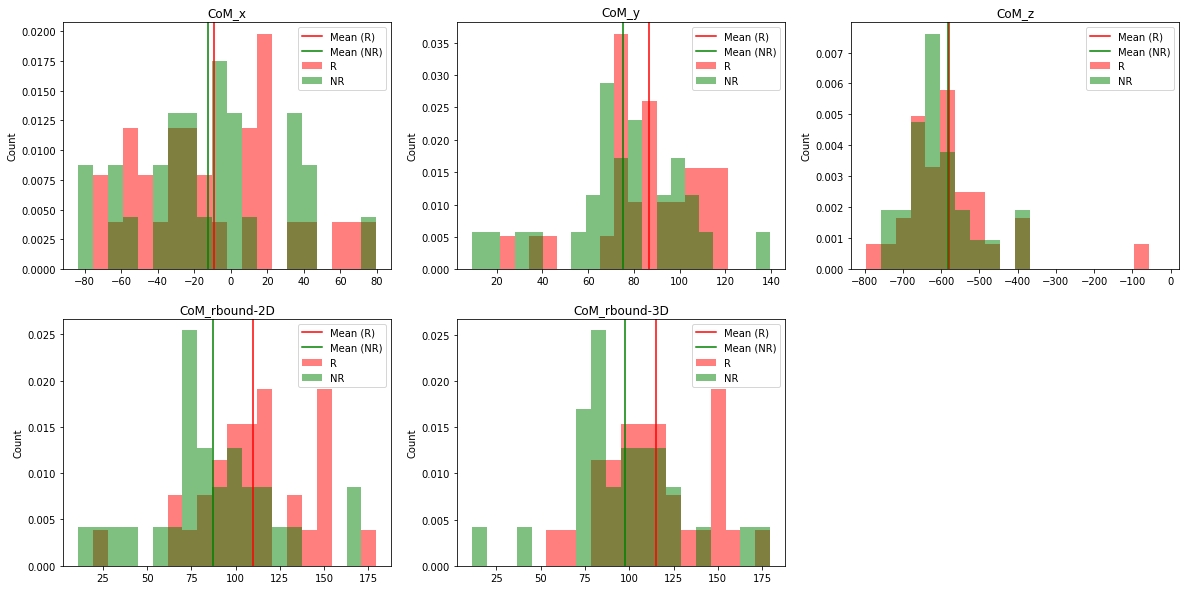

In [ ]:
R = master[master['replanned_or_not']=='R']
NR = master[master['replanned_or_not']=='NR']
plt.figure(figsize = (20,10))
print(Index.iloc[5,0]+": "+Index.iloc[5,1])
for i in enumerate(cols[63:68]):
  if R[i[1]].dtype == 'object':
    continue
  data = pd.concat([R[i[1]].dropna(), NR[i[1]].dropna()])
  data_min, data_max = min(data), max(data)
  xlim = (data_min, data_max)
  width = (data_max - data_min)/20
  bins = np.arange(xlim[0],xlim[-1]+width,float(width))
  plt.subplot(((len(cols[63:68])/3)+1),3,i[0]+1)
  plt.hist(R[i[1]].dropna() , color='red', bins =bins, label='R', alpha=0.5, density=True)
  plt.hist(NR[i[1]].dropna() , color='green', bins =bins, label='NR', alpha=0.5, density=True)
  plt.title(f"{i[1]}")
  plt.axvline(R[i[1]].mean(),color="red",label = 'Mean (R)')
  plt.axvline(NR[i[1]].mean(),color="green",label = 'Mean (NR)')
  plt.ylabel("Count")
  plt.legend()

xmin_line-segments_limits: The line segments associated for each calculated x_min per fraction is plotted on the same space.
The maximum and minimum values in the x, y, and z axis were determined to obtain two "limit" points: (min_x, min_y, min_z) and (max_x, max_y, max_z).
The midpoint of these two limit points serve as the center of the bounding sphere that contains all line segments, while the distance between them is the diameter of the sphere.


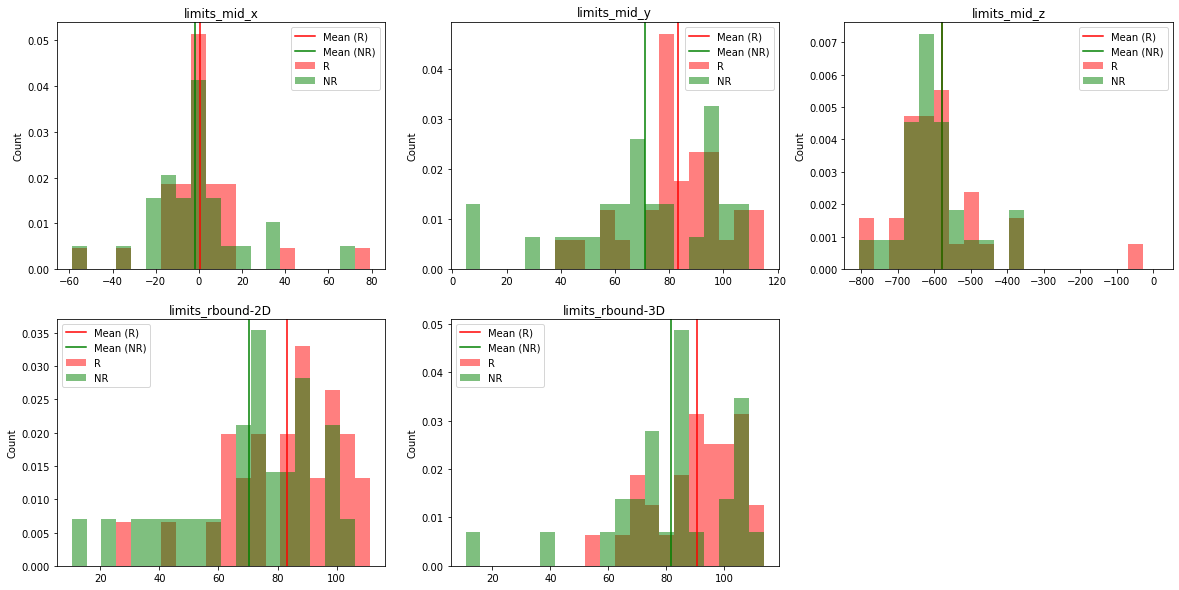

In [ ]:
R = master[master['replanned_or_not']=='R']
NR = master[master['replanned_or_not']=='NR']
plt.figure(figsize = (20,10))
print(Index.iloc[6,0]+": "+Index.iloc[6,1])
for i in enumerate(cols[68:73]):
  if R[i[1]].dtype == 'object':
    continue
  data = pd.concat([R[i[1]].dropna(), NR[i[1]].dropna()])
  data_min, data_max = min(data), max(data)
  xlim = (data_min, data_max)
  width = (data_max - data_min)/20
  bins = np.arange(xlim[0],xlim[-1]+width,float(width))
  plt.subplot(((len(cols[68:73])/3)+1),3,i[0]+1)
  plt.hist(R[i[1]].dropna() , color='red', bins =bins, label='R', alpha=0.5, density=True)
  plt.hist(NR[i[1]].dropna() , color='green', bins =bins, label='NR', alpha=0.5, density=True)
  plt.title(f"{i[1]}")
  plt.axvline(R[i[1]].mean(),color="red",label = 'Mean (R)')
  plt.axvline(NR[i[1]].mean(),color="green",label = 'Mean (NR)')
  plt.ylabel("Count")
  plt.legend()

xmed_slope: Rate of change of xmed over time (fractions).


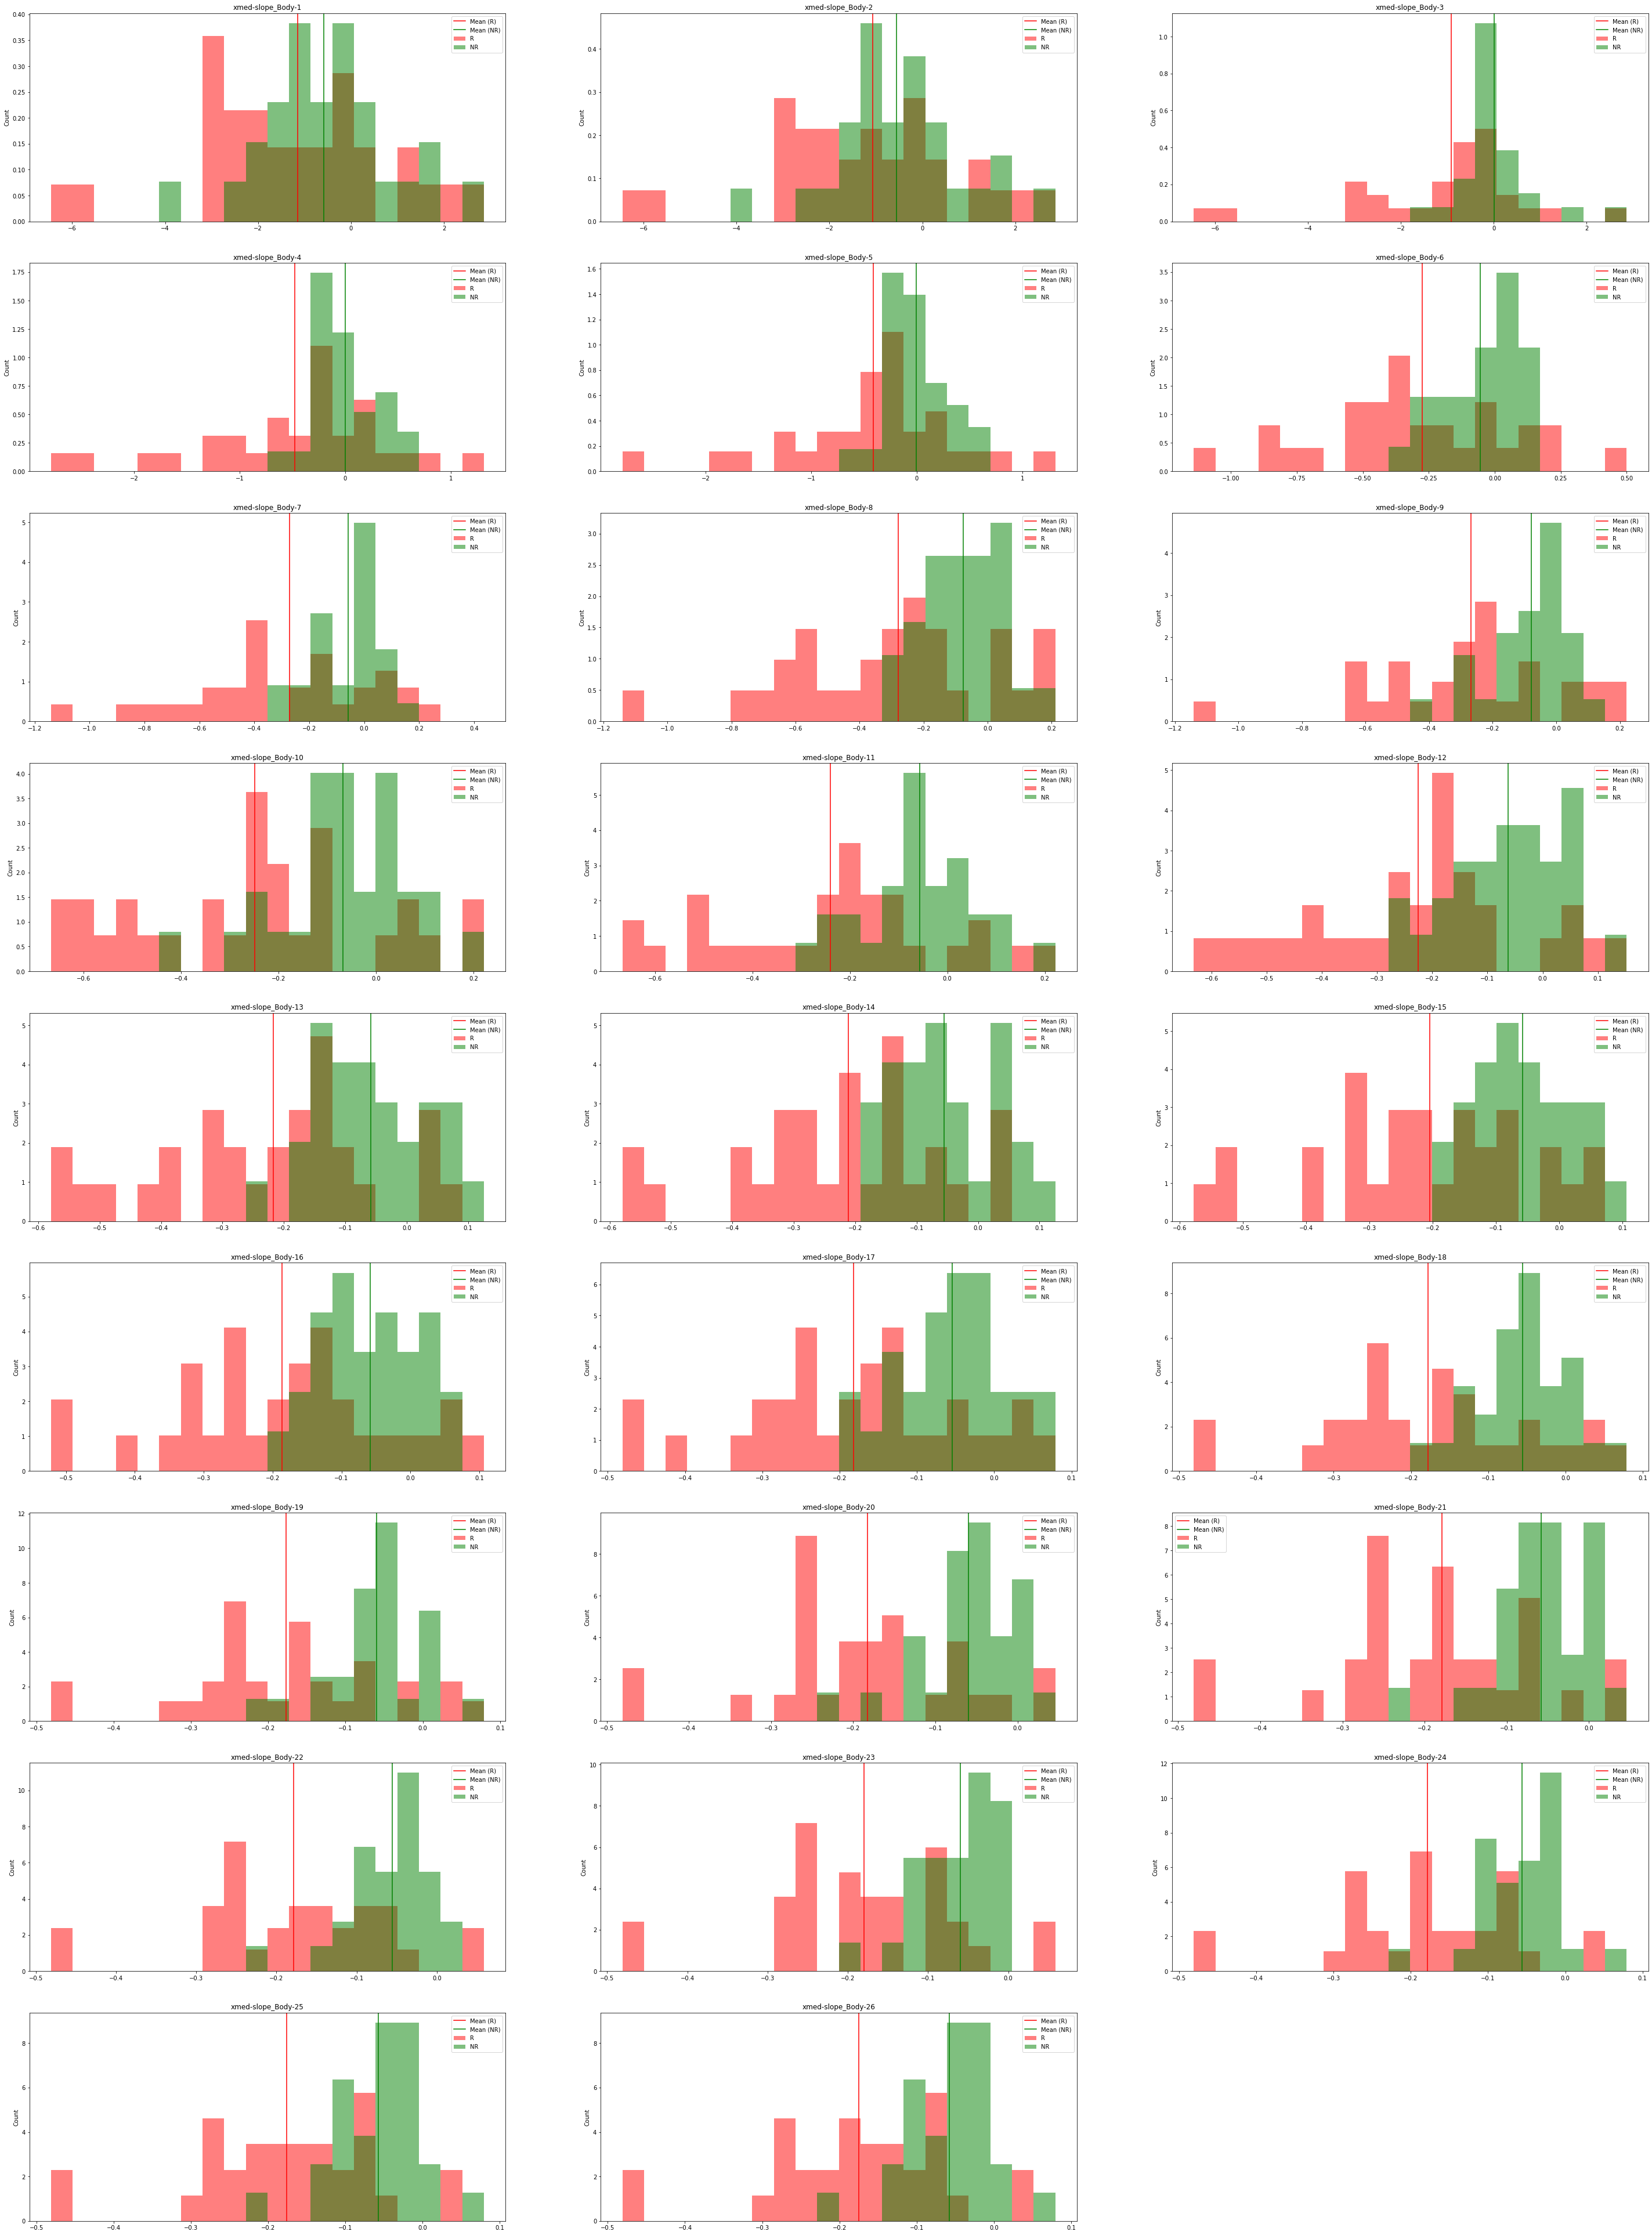

In [ ]:
R = master[master['replanned_or_not']=='R']
NR = master[master['replanned_or_not']=='NR']
plt.figure(figsize = (50,70))
print(Index.iloc[8,0]+": "+Index.iloc[8,1])
for i in enumerate(cols[73:99]):
  if R[i[1]].dtype == 'object':
    continue
  data = pd.concat([R[i[1]].dropna(), NR[i[1]].dropna()])
  data_min, data_max = min(data), max(data)
  xlim = (data_min, data_max)
  width = (data_max - data_min)/20
  bins = np.arange(xlim[0],xlim[-1]+width,float(width))
  plt.subplot(((len(cols[73:99])/3)+1),3,i[0]+1)
  plt.hist(R[i[1]].dropna() , color='red', bins =bins, label='R', alpha=0.5, density=True)
  plt.hist(NR[i[1]].dropna() , color='green', bins =bins, label='NR', alpha=0.5, density=True)
  plt.title(f"{i[1]}")
  plt.axvline(R[i[1]].mean(),color="red",label = 'Mean (R)')
  plt.axvline(NR[i[1]].mean(),color="green",label = 'Mean (NR)')
  plt.ylabel("Count")
  plt.legend()

xave_slope: Rate of change of xave over time (fractions).


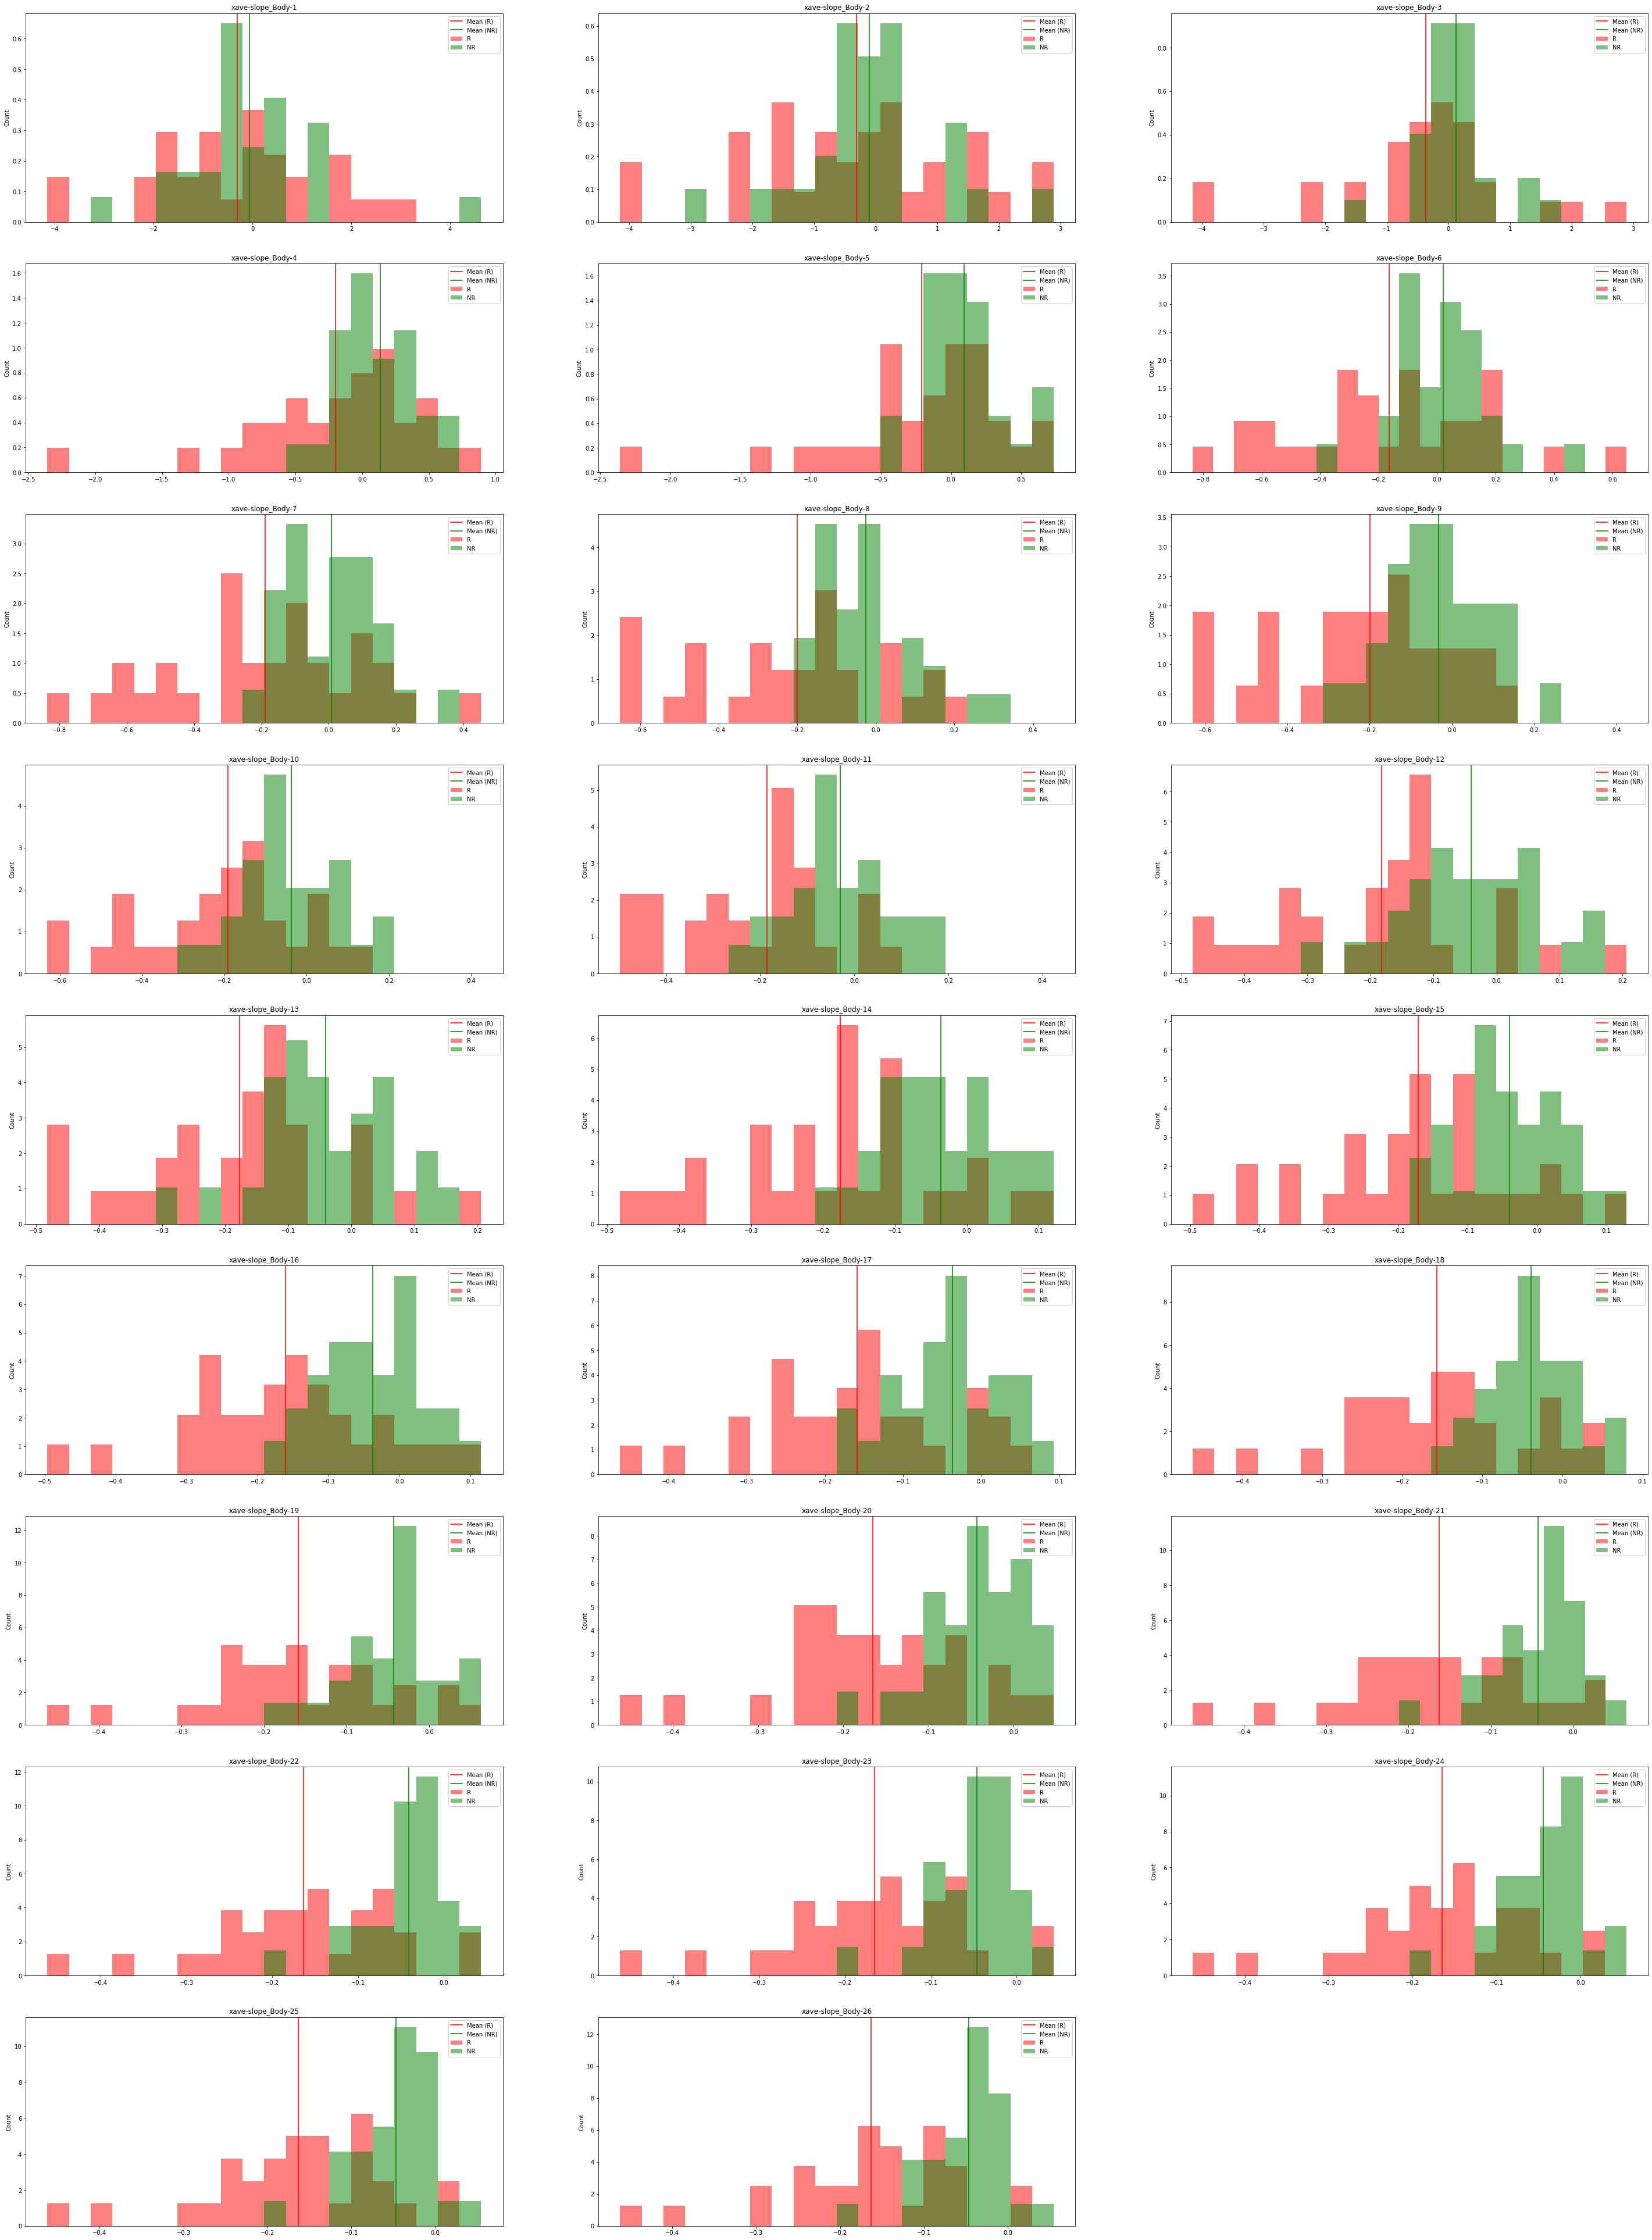

In [ ]:
R = master[master['replanned_or_not']=='R']
NR = master[master['replanned_or_not']=='NR']
plt.figure(figsize = (50,70))
print(Index.iloc[10,0]+": "+Index.iloc[10,1])
for i in enumerate(cols[99:125]):
  if R[i[1]].dtype == 'object':
    continue
  data = pd.concat([R[i[1]].dropna(), NR[i[1]].dropna()])
  data_min, data_max = min(data), max(data)
  xlim = (data_min, data_max)
  width = (data_max - data_min)/20
  bins = np.arange(xlim[0],xlim[-1]+width,float(width))
  plt.subplot(((len(cols[99:125])/3)+1),3,i[0]+1)
  plt.hist(R[i[1]].dropna() , color='red', bins =bins, label='R', alpha=0.5, density=True)
  plt.hist(NR[i[1]].dropna() , color='green', bins =bins, label='NR', alpha=0.5, density=True)
  plt.title(f"{i[1]}")
  plt.axvline(R[i[1]].mean(),color="red",label = 'Mean (R)')
  plt.axvline(NR[i[1]].mean(),color="green",label = 'Mean (NR)')
  plt.ylabel("Count")
  plt.legend()

volume_body: Volume of the body from the CT-sim and CBCT images.


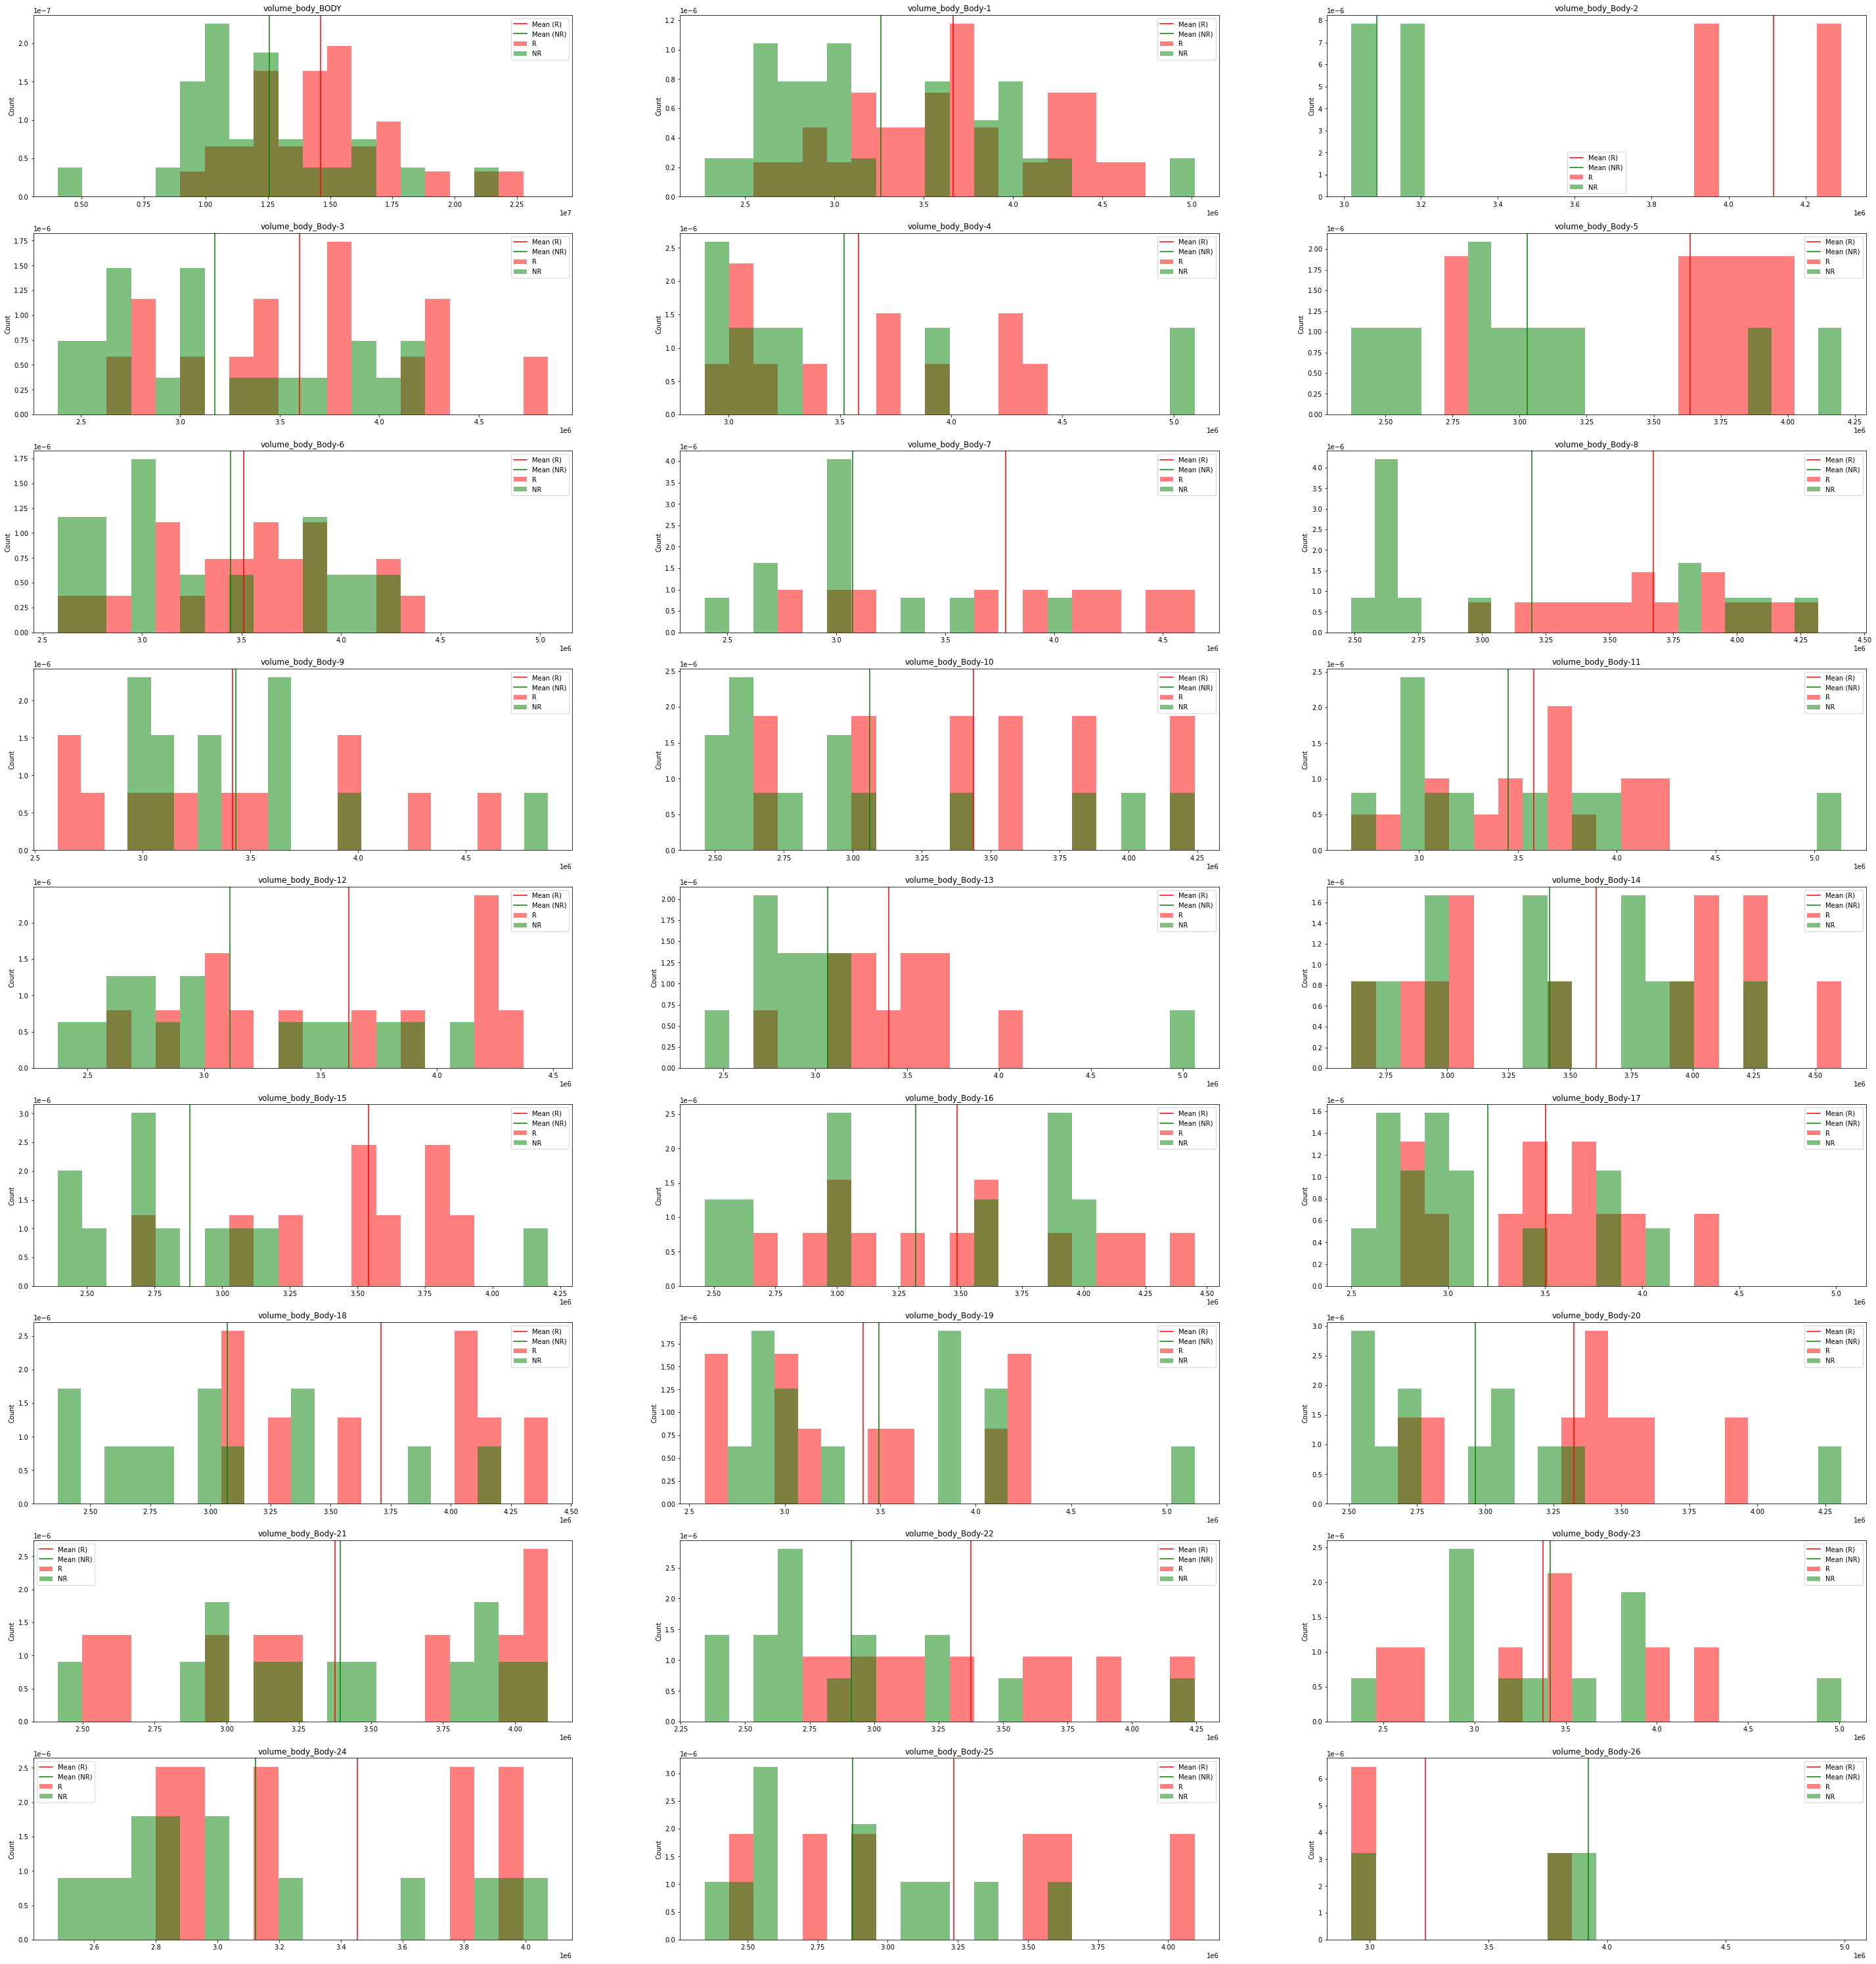

In [ ]:
R = master[master['replanned_or_not']=='R']
NR = master[master['replanned_or_not']=='NR']
plt.figure(figsize = (50,60))
print(Index.iloc[11,0]+": "+Index.iloc[11,1])
for i in enumerate(cols[125:152]):
  if R[i[1]].dtype == 'object':
    continue
  data = pd.concat([R[i[1]].dropna(), NR[i[1]].dropna()])
  data_min, data_max = min(data), max(data)
  xlim = (data_min, data_max)
  width = (data_max - data_min)/20
  bins = np.arange(xlim[0],xlim[-1]+width,float(width))
  plt.subplot(((len(cols[125:152])/3)+1),3,i[0]+1)
  plt.hist(R[i[1]].dropna() , color='red', bins =bins, label='R', alpha=0.5, density=True)
  plt.hist(NR[i[1]].dropna() , color='green', bins =bins, label='NR', alpha=0.5, density=True)
  plt.title(f"{i[1]}")
  plt.axvline(R[i[1]].mean(),color="red",label = 'Mean (R)')
  plt.axvline(NR[i[1]].mean(),color="green",label = 'Mean (NR)')
  plt.ylabel("Count")
  plt.legend()

volume_body_slope: Rate of change of volume_body over time.


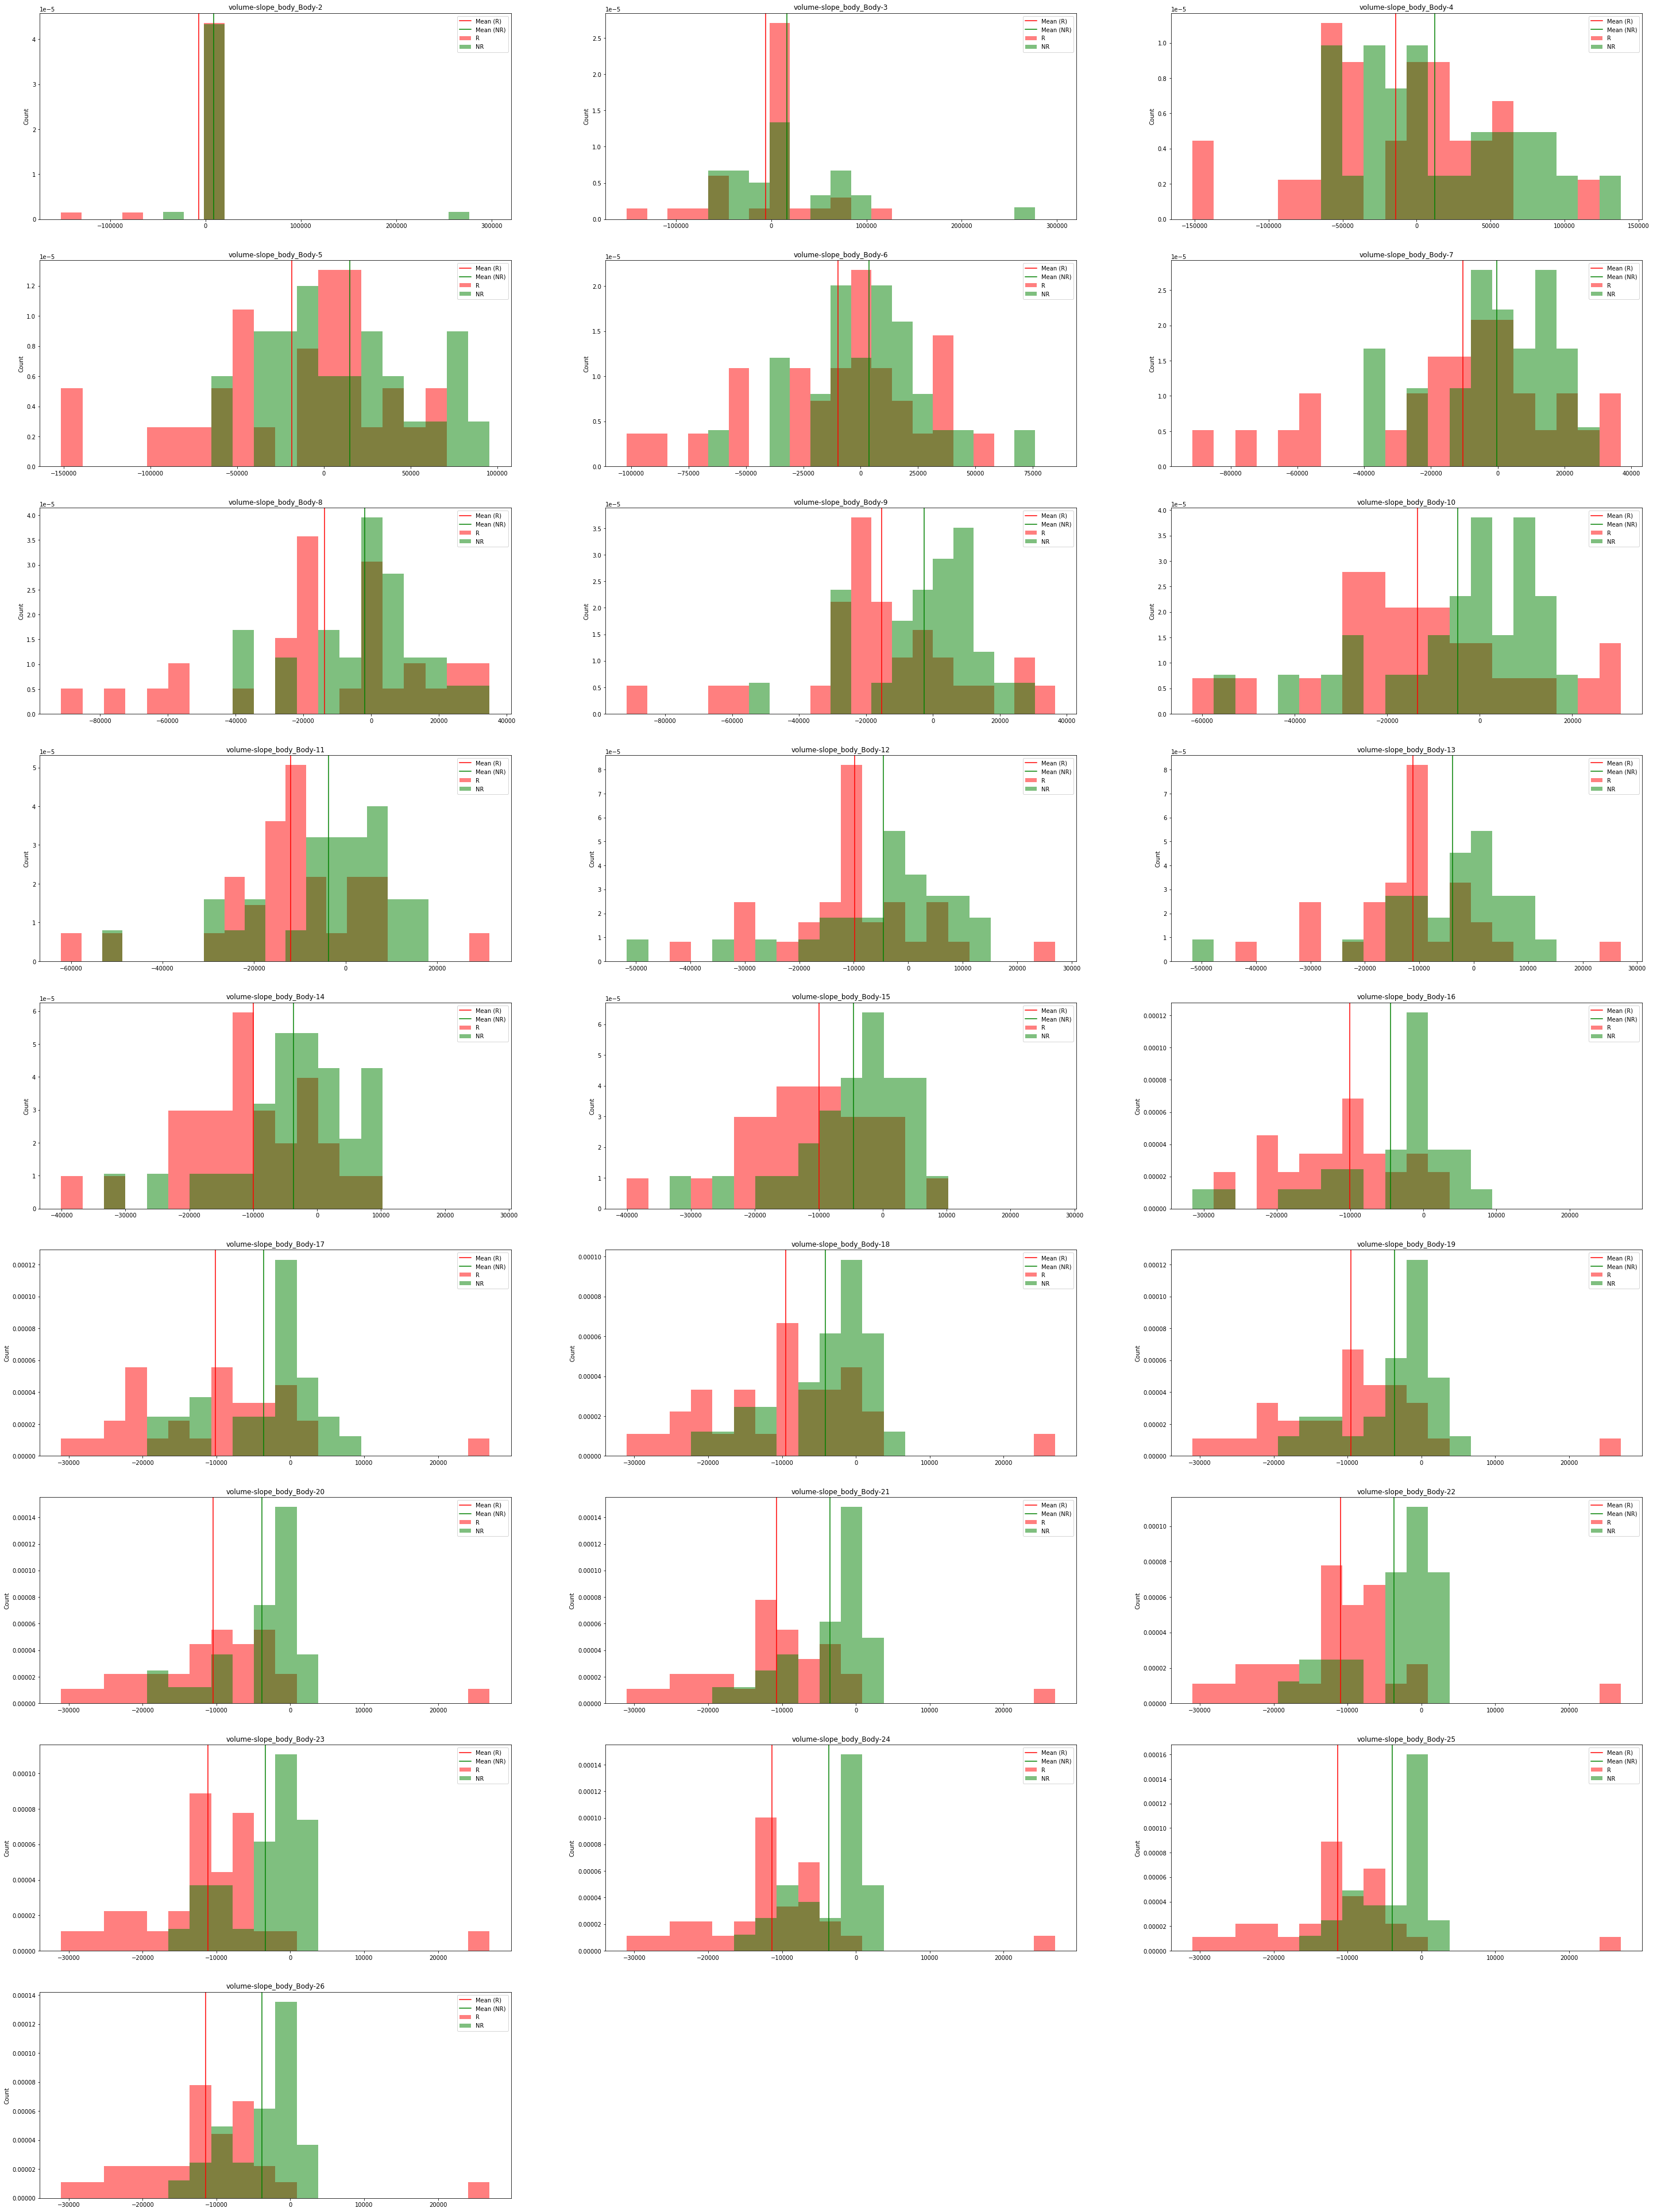

In [ ]:
R = master[master['replanned_or_not']=='R']
NR = master[master['replanned_or_not']=='NR']
plt.figure(figsize = (50,70))
print(Index.iloc[12,0]+": "+Index.iloc[12,1])
for i in enumerate(cols[152:177]):
  if R[i[1]].dtype == 'object':
    continue
  data = pd.concat([R[i[1]].dropna(), NR[i[1]].dropna()])
  data_min, data_max = min(data), max(data)
  xlim = (data_min, data_max)
  width = (data_max - data_min)/20
  bins = np.arange(xlim[0],xlim[-1]+width,float(width))
  plt.subplot(((len(cols[152:177])/3)+1),3,i[0]+1)
  plt.hist(R[i[1]].dropna() , color='red', bins =bins, label='R', alpha=0.5, density=True)
  plt.hist(NR[i[1]].dropna() , color='green', bins =bins, label='NR', alpha=0.5, density=True)
  plt.title(f"{i[1]}")
  plt.axvline(R[i[1]].mean(),color="red",label = 'Mean (R)')
  plt.axvline(NR[i[1]].mean(),color="green",label = 'Mean (NR)')
  plt.ylabel("Count")
  plt.legend()

volume_outer-PTV: Volume of the PTV outside of the skin.


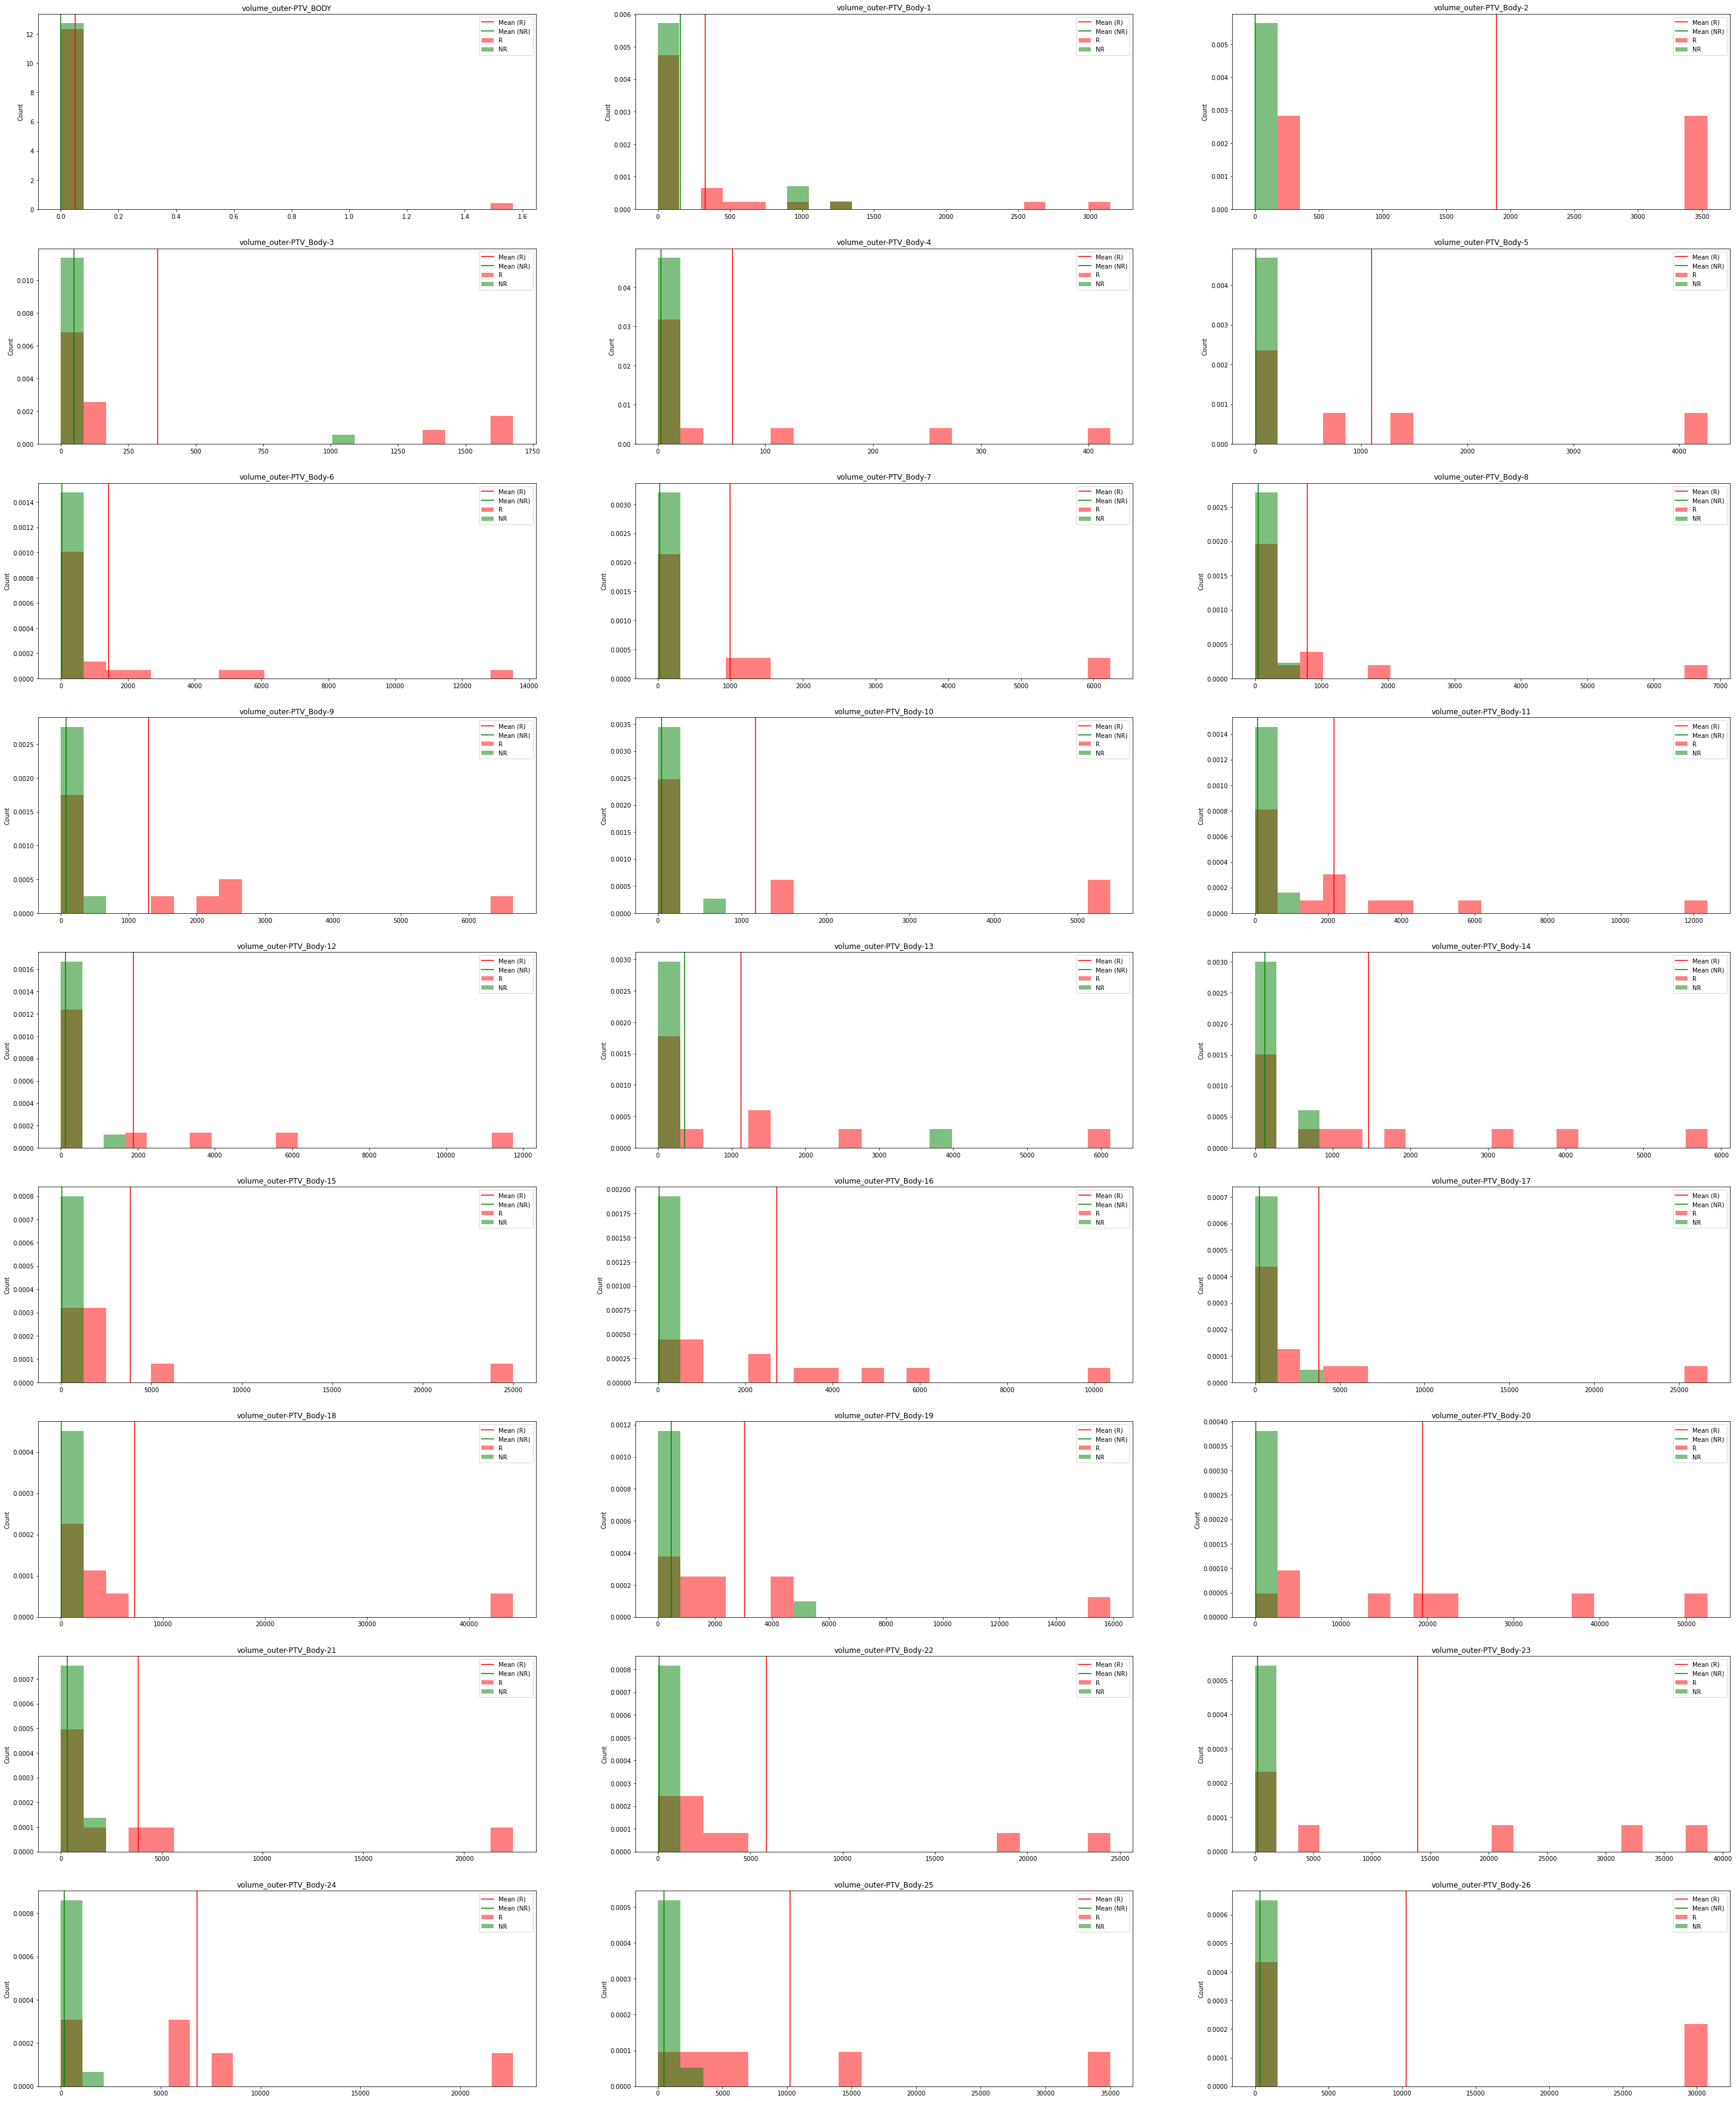

In [ ]:
R = master[master['replanned_or_not']=='R']
NR = master[master['replanned_or_not']=='NR']
plt.figure(figsize = (50,70))
print(Index.iloc[13,0]+": "+Index.iloc[13,1])
for i in enumerate(cols[177:204]):
  if R[i[1]].dtype == 'object':
    continue
  data = pd.concat([R[i[1]].dropna(), NR[i[1]].dropna()])
  data_min, data_max = min(data), max(data)
  xlim = (data_min, data_max)
  width = (data_max - data_min)/20
  bins = np.arange(xlim[0],xlim[-1]+width,float(width))
  plt.subplot(((len(cols[177:204])/3)+1),3,i[0]+1)
  plt.hist(R[i[1]].dropna() , color='red', bins =bins, label='R', alpha=0.5, density=True)
  plt.hist(NR[i[1]].dropna() , color='green', bins =bins, label='NR', alpha=0.5, density=True)
  plt.title(f"{i[1]}")
  plt.axvline(R[i[1]].mean(),color="red",label = 'Mean (R)')
  plt.axvline(NR[i[1]].mean(),color="green",label = 'Mean (NR)')
  plt.ylabel("Count")
  plt.legend()

volume_outer-PTV_slope: Rate of change of volume_outer-PTV over time.


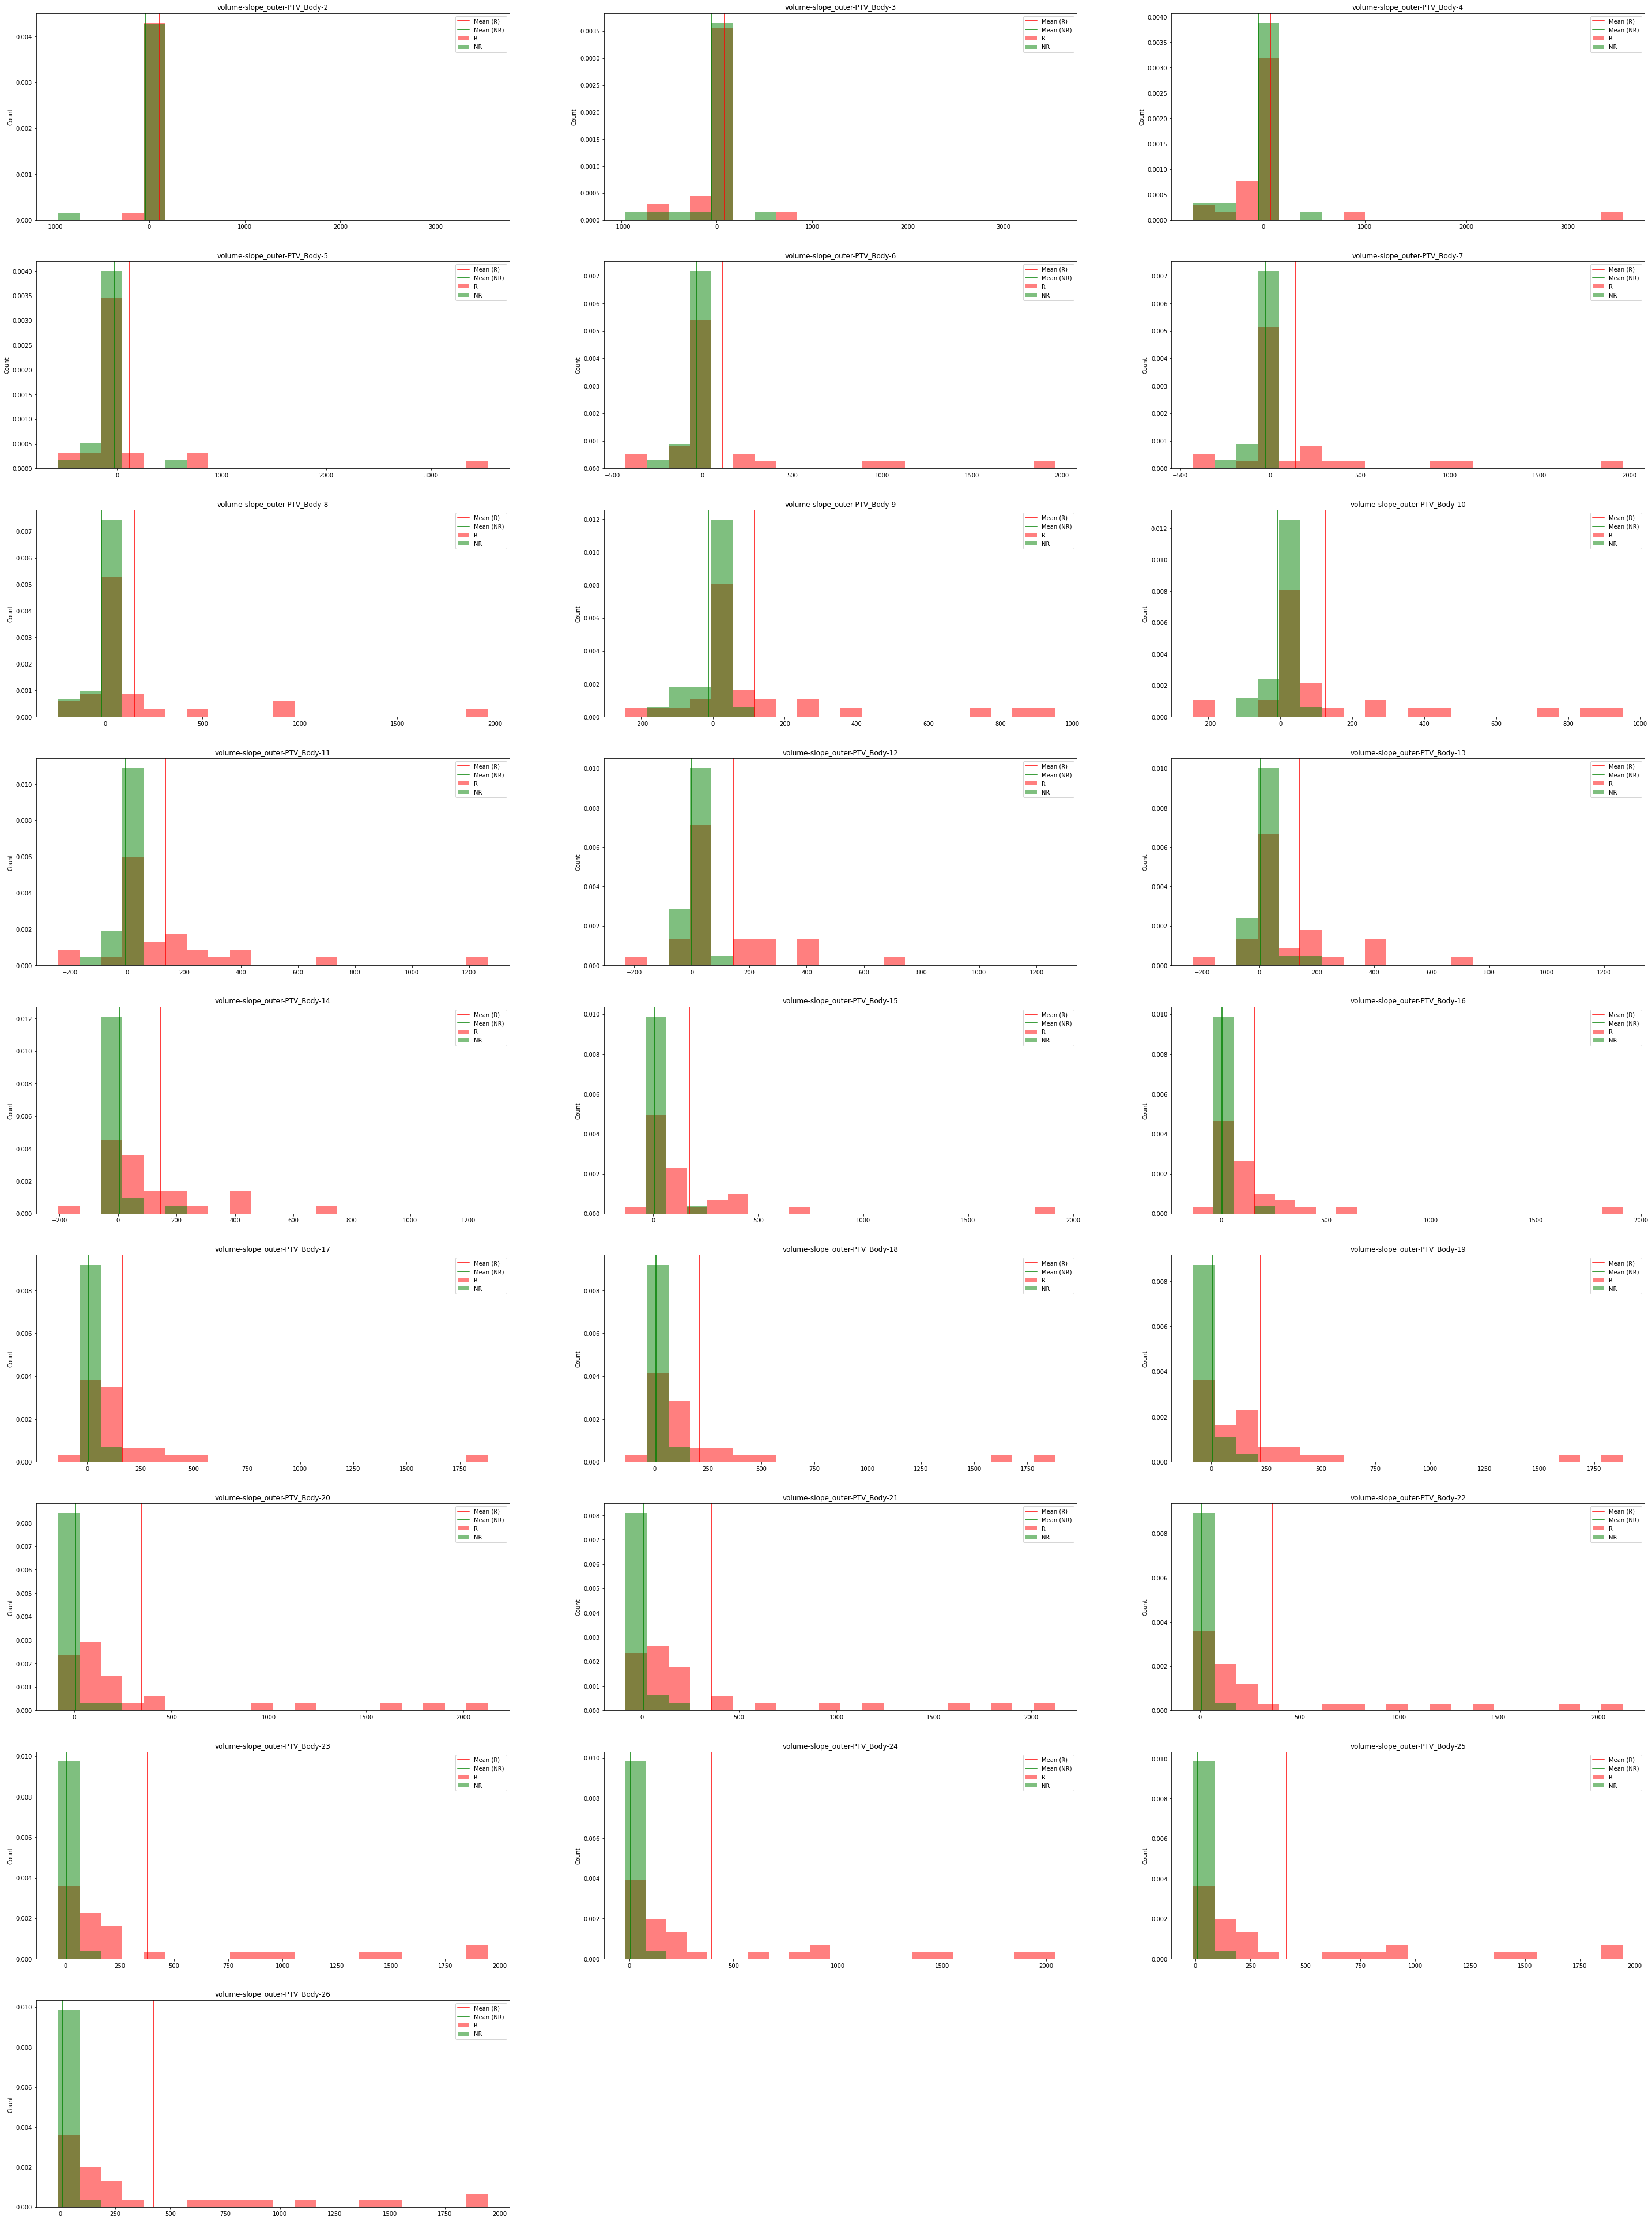

In [ ]:
R = master[master['replanned_or_not']=='R']
NR = master[master['replanned_or_not']=='NR']
plt.figure(figsize = (50,70))
print(Index.iloc[14,0]+": "+Index.iloc[14,1])
for i in enumerate(cols[204:229]):
  if R[i[1]].dtype == 'object':
    continue
  data = pd.concat([R[i[1]].dropna(), NR[i[1]].dropna()])
  data_min, data_max = min(data), max(data)
  xlim = (data_min, data_max)
  width = (data_max - data_min)/20
  bins = np.arange(xlim[0],xlim[-1]+width,float(width))
  plt.subplot(((len(cols[204:229])/3)+1),3,i[0]+1)
  plt.hist(R[i[1]].dropna() , color='red', bins =bins, label='R', alpha=0.5, density=True)
  plt.hist(NR[i[1]].dropna() , color='green', bins =bins, label='NR', alpha=0.5, density=True)
  plt.title(f"{i[1]}")
  plt.axvline(R[i[1]].mean(),color="red",label = 'Mean (R)')
  plt.axvline(NR[i[1]].mean(),color="green",label = 'Mean (NR)')
  plt.ylabel("Count")
  plt.legend()

volume-ratio_inner-PTV: The volume of the inner PTV divided by the volume of the body structure.


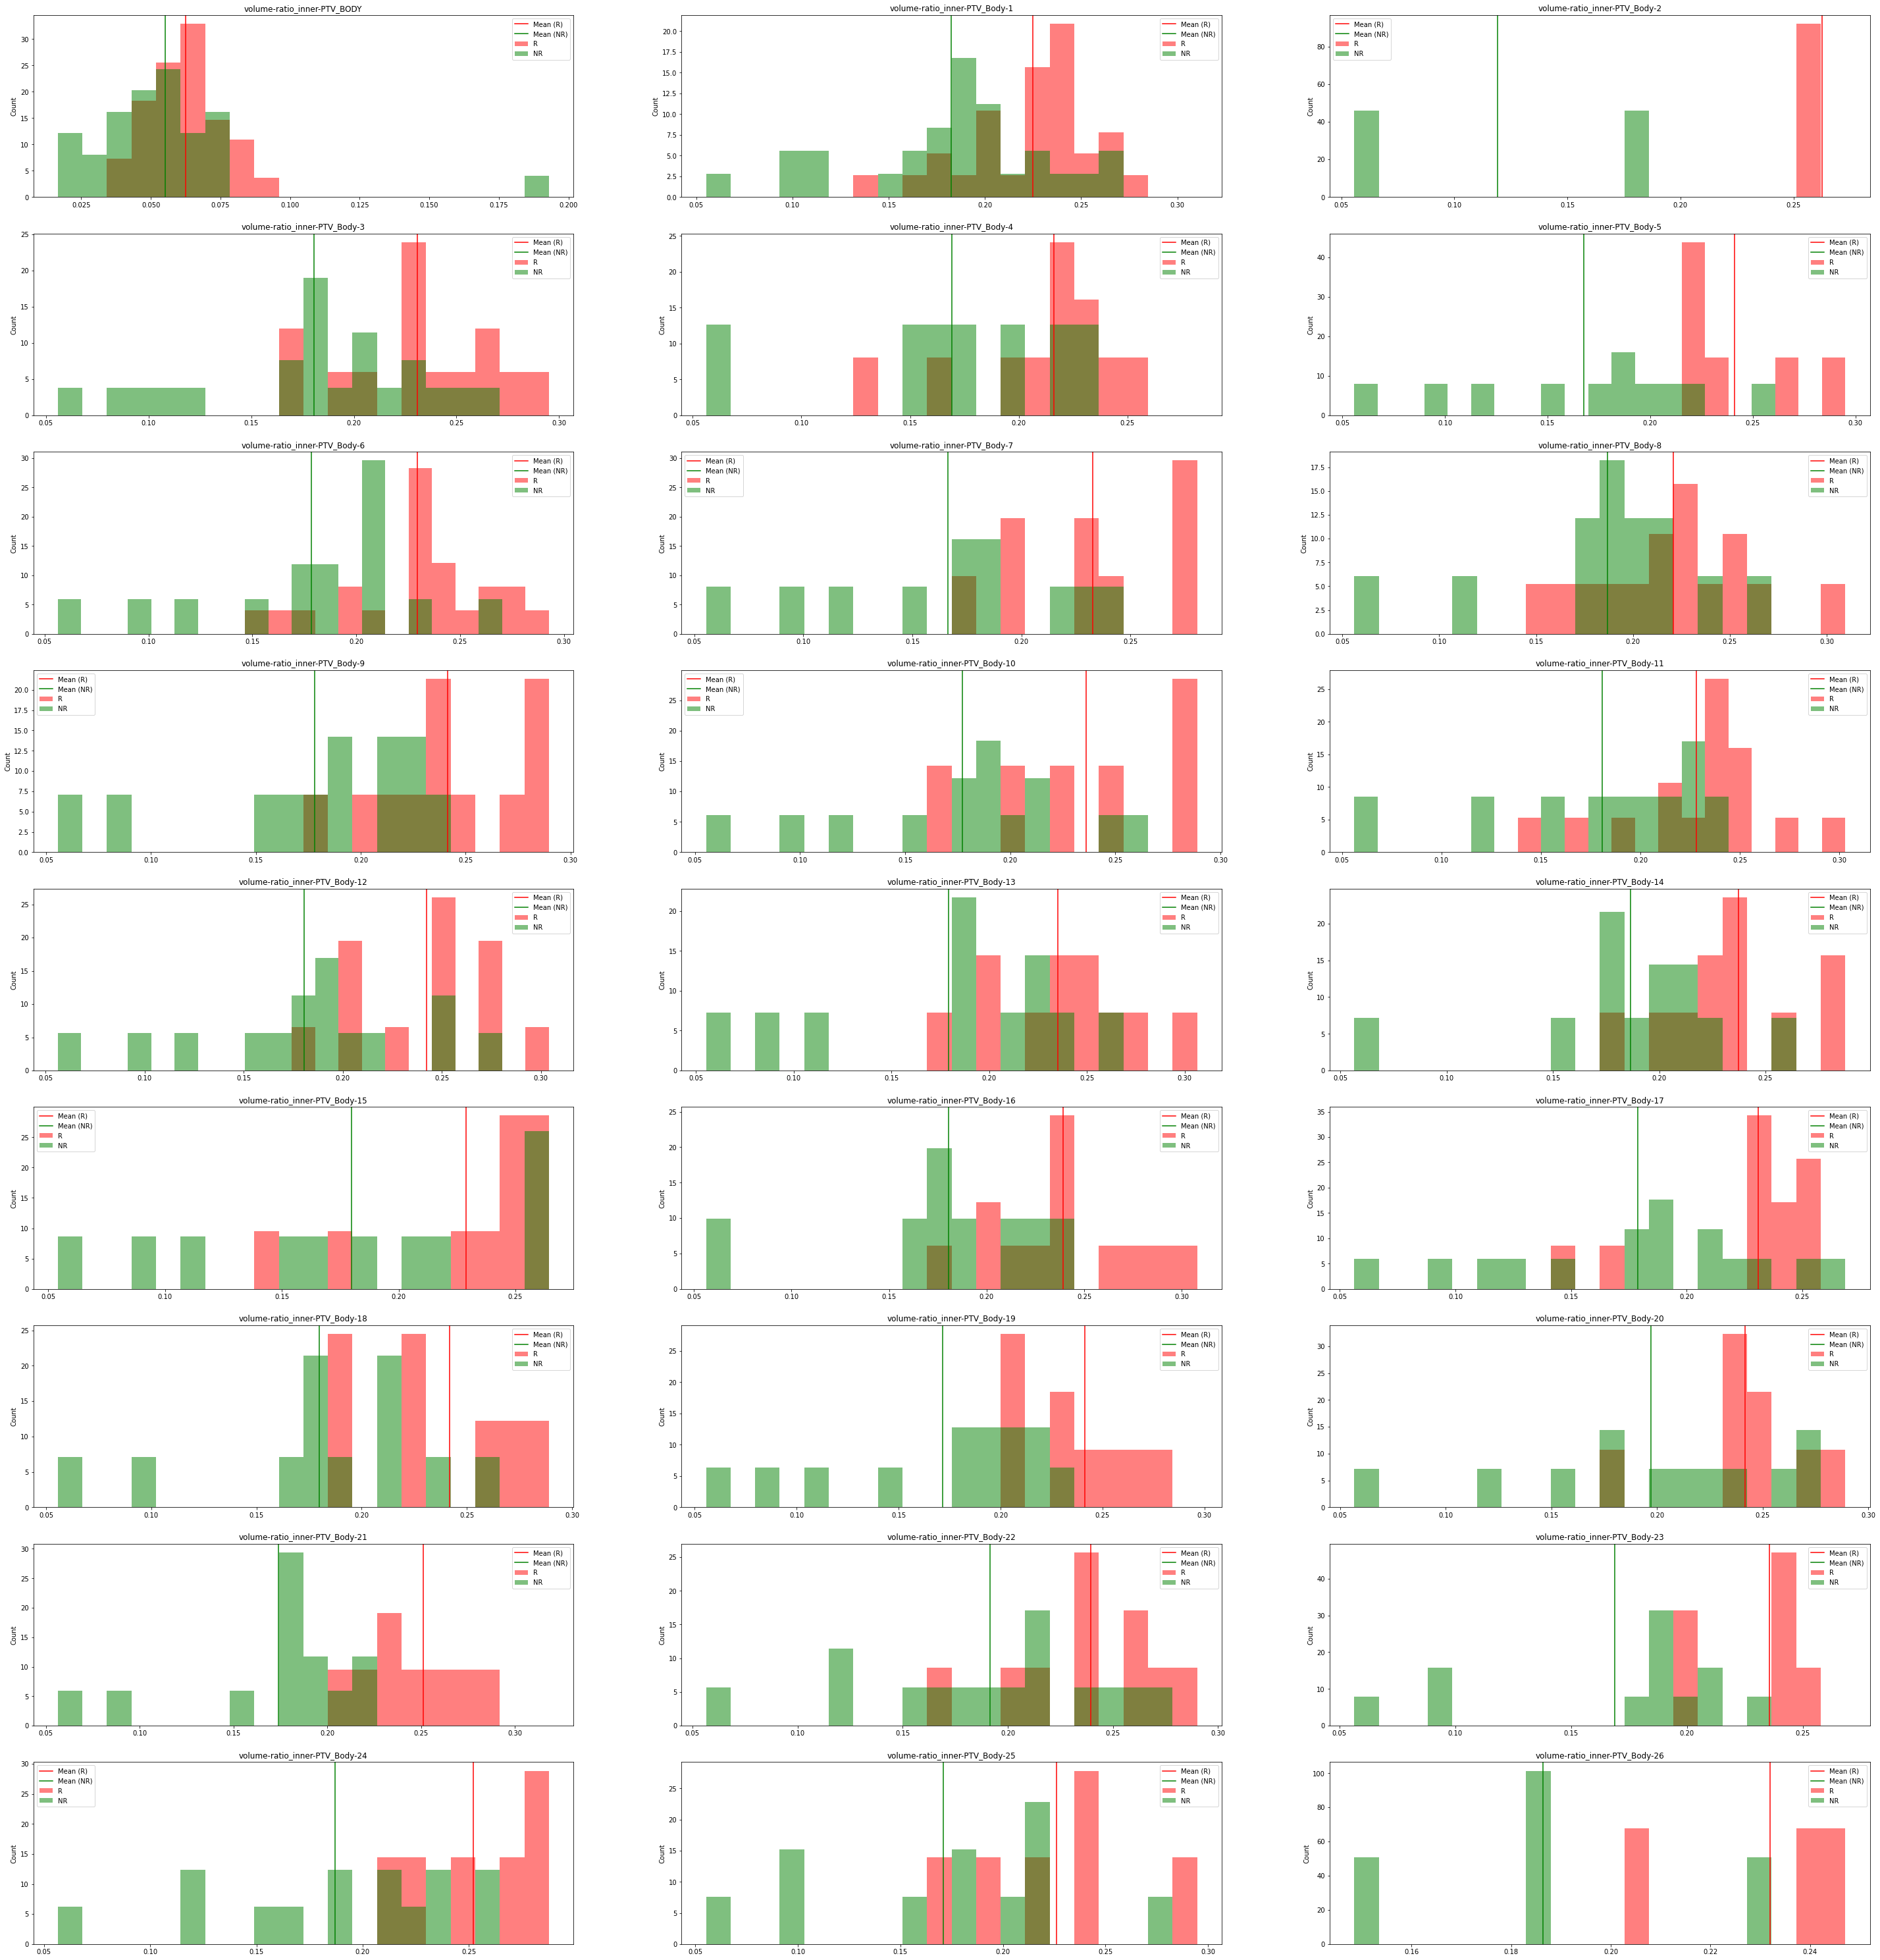

In [ ]:
R = master[master['replanned_or_not']=='R']
NR = master[master['replanned_or_not']=='NR']
plt.figure(figsize = (50,60))
print(Index.iloc[15,0]+": "+Index.iloc[15,1])
for i in enumerate(cols[229:256]):
  if R[i[1]].dtype == 'object':
    continue
  data = pd.concat([R[i[1]].dropna(), NR[i[1]].dropna()])
  data_min, data_max = min(data), max(data)
  xlim = (data_min, data_max)
  width = (data_max - data_min)/20
  bins = np.arange(xlim[0],xlim[-1]+width,float(width))
  plt.subplot(((len(cols[229:256])/3)+1),3,i[0]+1)
  plt.hist(R[i[1]].dropna() , color='red', bins =bins, label='R', alpha=0.5, density=True)
  plt.hist(NR[i[1]].dropna() , color='green', bins =bins, label='NR', alpha=0.5, density=True)
  plt.title(f"{i[1]}")
  plt.axvline(R[i[1]].mean(),color="red",label = 'Mean (R)')
  plt.axvline(NR[i[1]].mean(),color="green",label = 'Mean (NR)')
  plt.ylabel("Count")
  plt.legend()

volume-ratio_inner-PTV_slope: Rate of change of volume-ratio_inner-PTV over time.


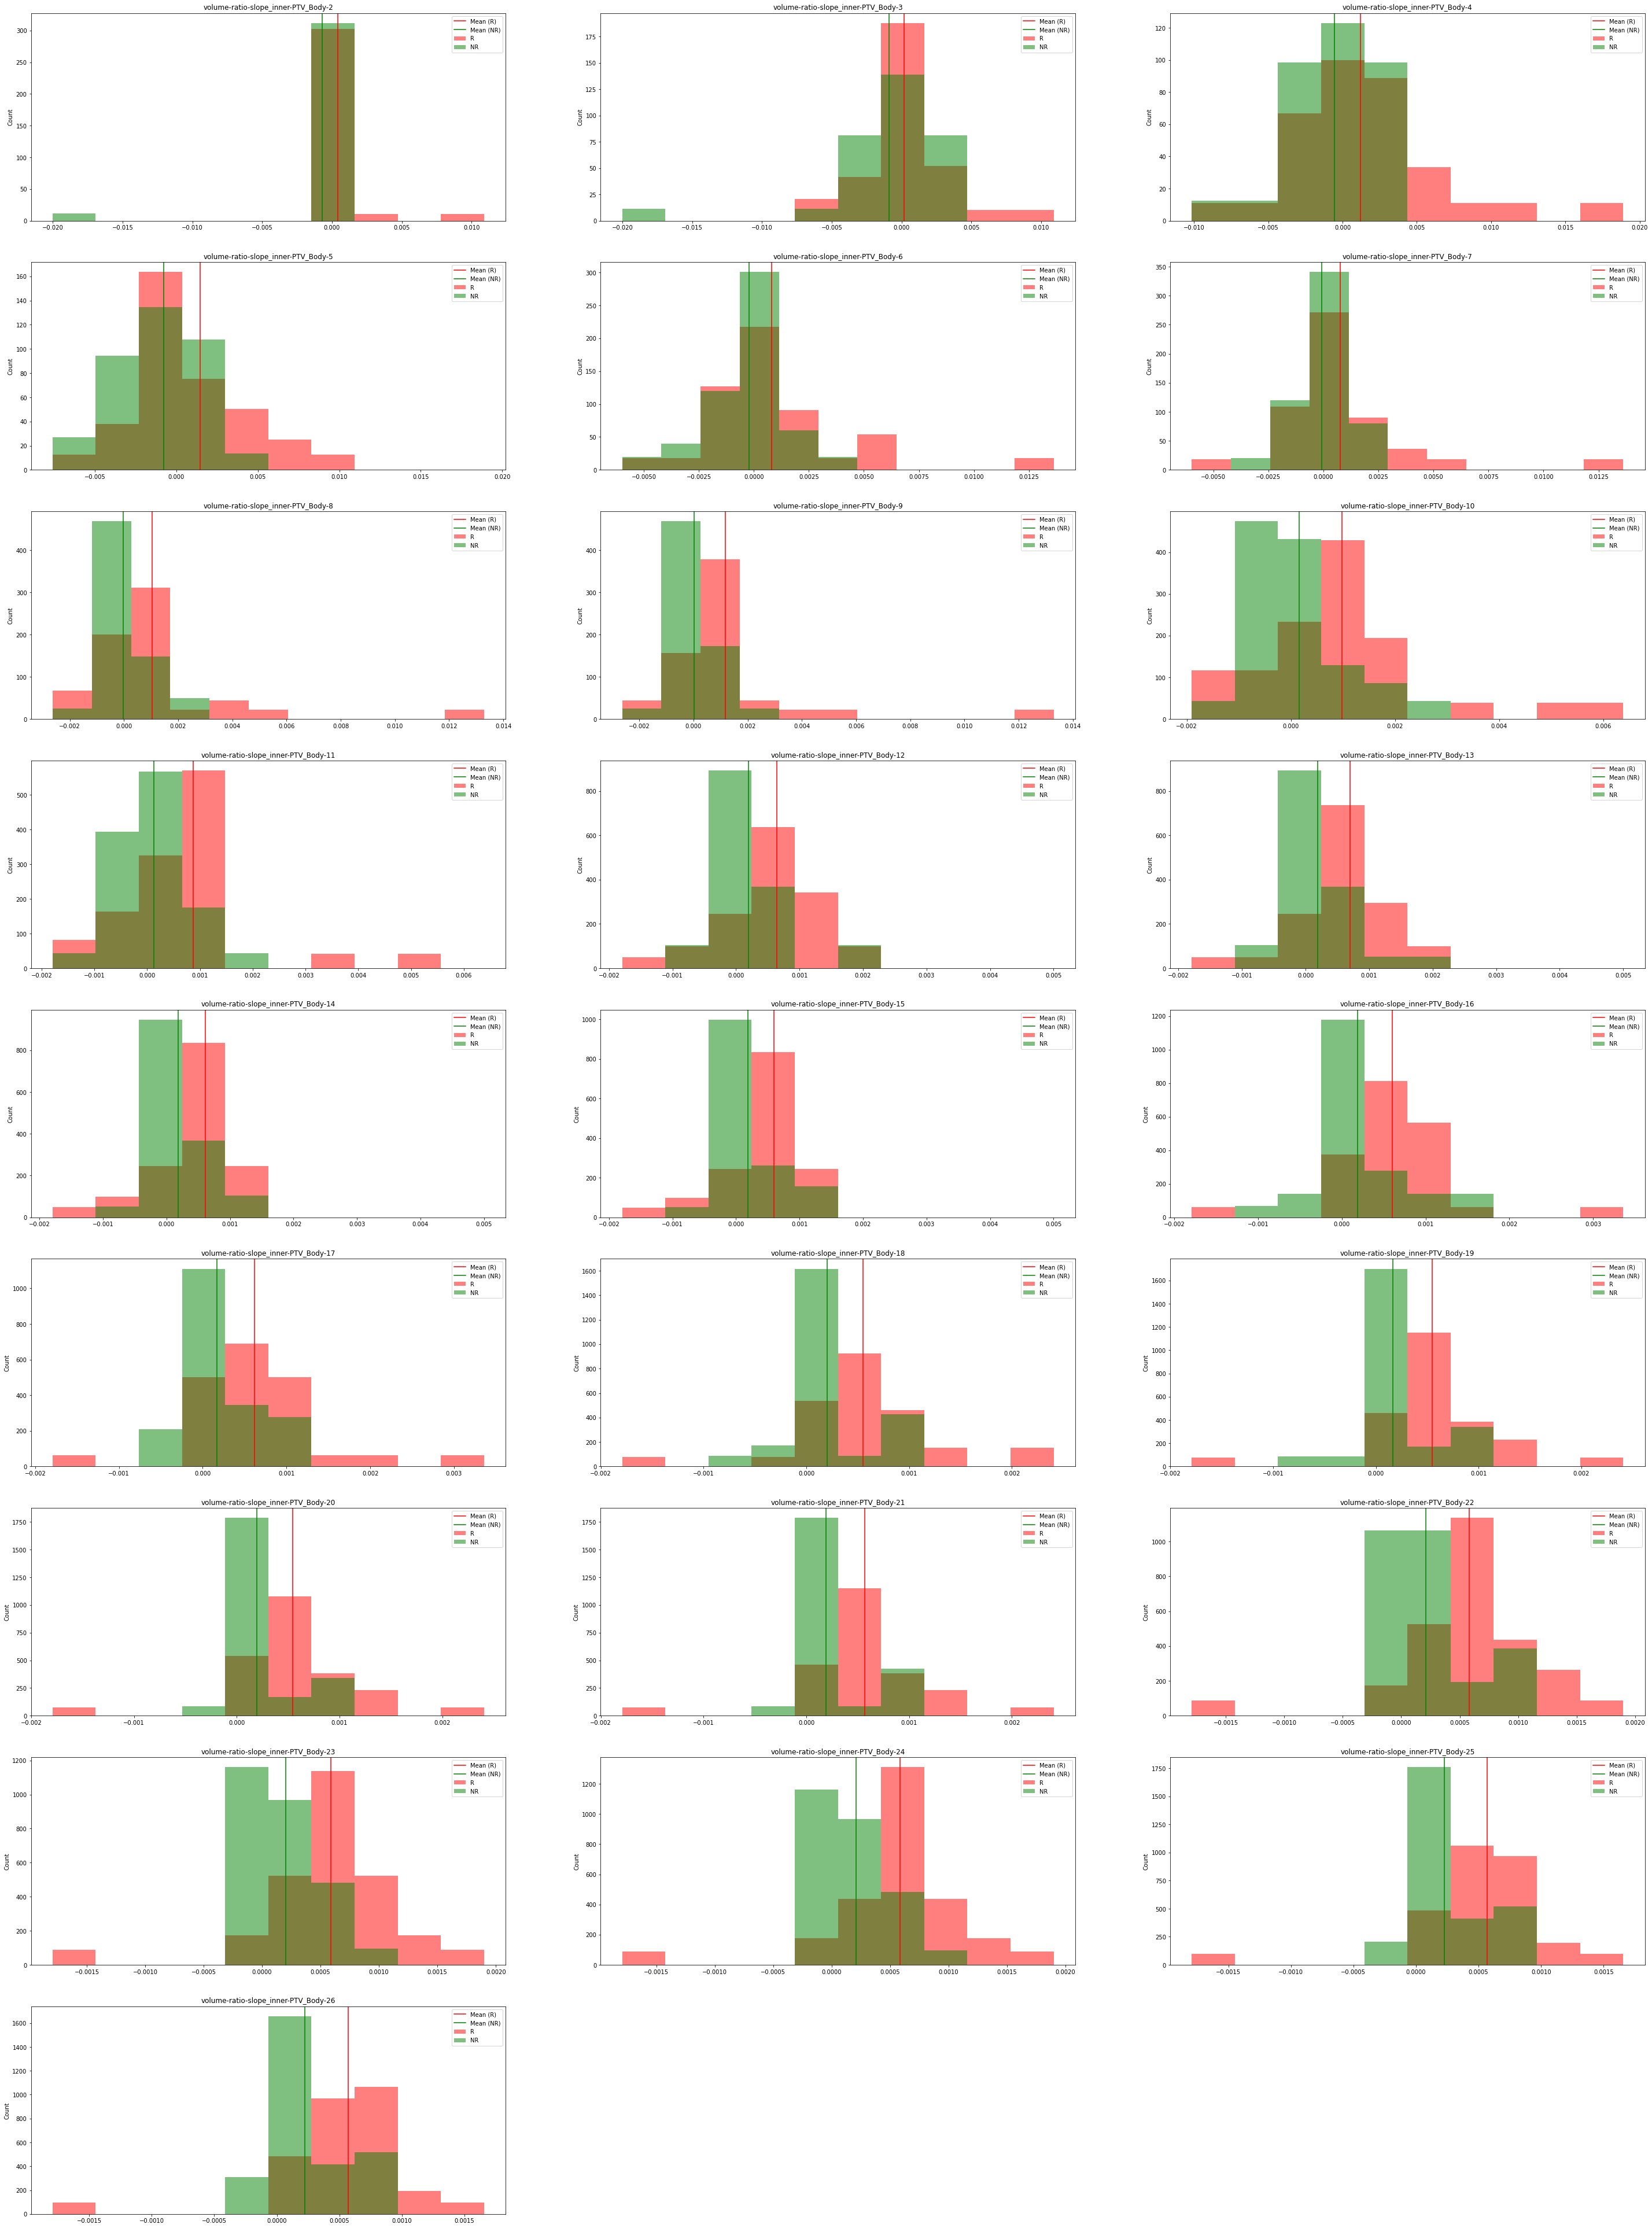

In [ ]:
R = master[master['replanned_or_not']=='R']
NR = master[master['replanned_or_not']=='NR']
plt.figure(figsize = (50,70))
print(Index.iloc[16,0]+": "+Index.iloc[16,1])
for i in enumerate(cols[256:281]):
  if R[i[1]].dtype == 'object':
    continue
  data = pd.concat([R[i[1]].dropna(), NR[i[1]].dropna()])
  data_min, data_max = min(data), max(data)
  xlim = (data_min, data_max)
  width = (data_max - data_min)/10
  bins = np.arange(xlim[0],xlim[-1]+width,float(width))
  plt.subplot(((len(cols[256:281])/3)+1),3,i[0]+1)
  plt.hist(R[i[1]].dropna() , color='red', bins =bins, label='R', alpha=0.5, density=True)
  plt.hist(NR[i[1]].dropna() , color='green', bins =bins, label='NR', alpha=0.5, density=True)
  plt.title(f"{i[1]}")
  plt.axvline(R[i[1]].mean(),color="red",label = 'Mean (R)')
  plt.axvline(NR[i[1]].mean(),color="green",label = 'Mean (NR)')
  plt.ylabel("Count")
  plt.legend()

volume-ratio_outer-PTV: The volume of the outer PTV divided by the volume of the body structure.


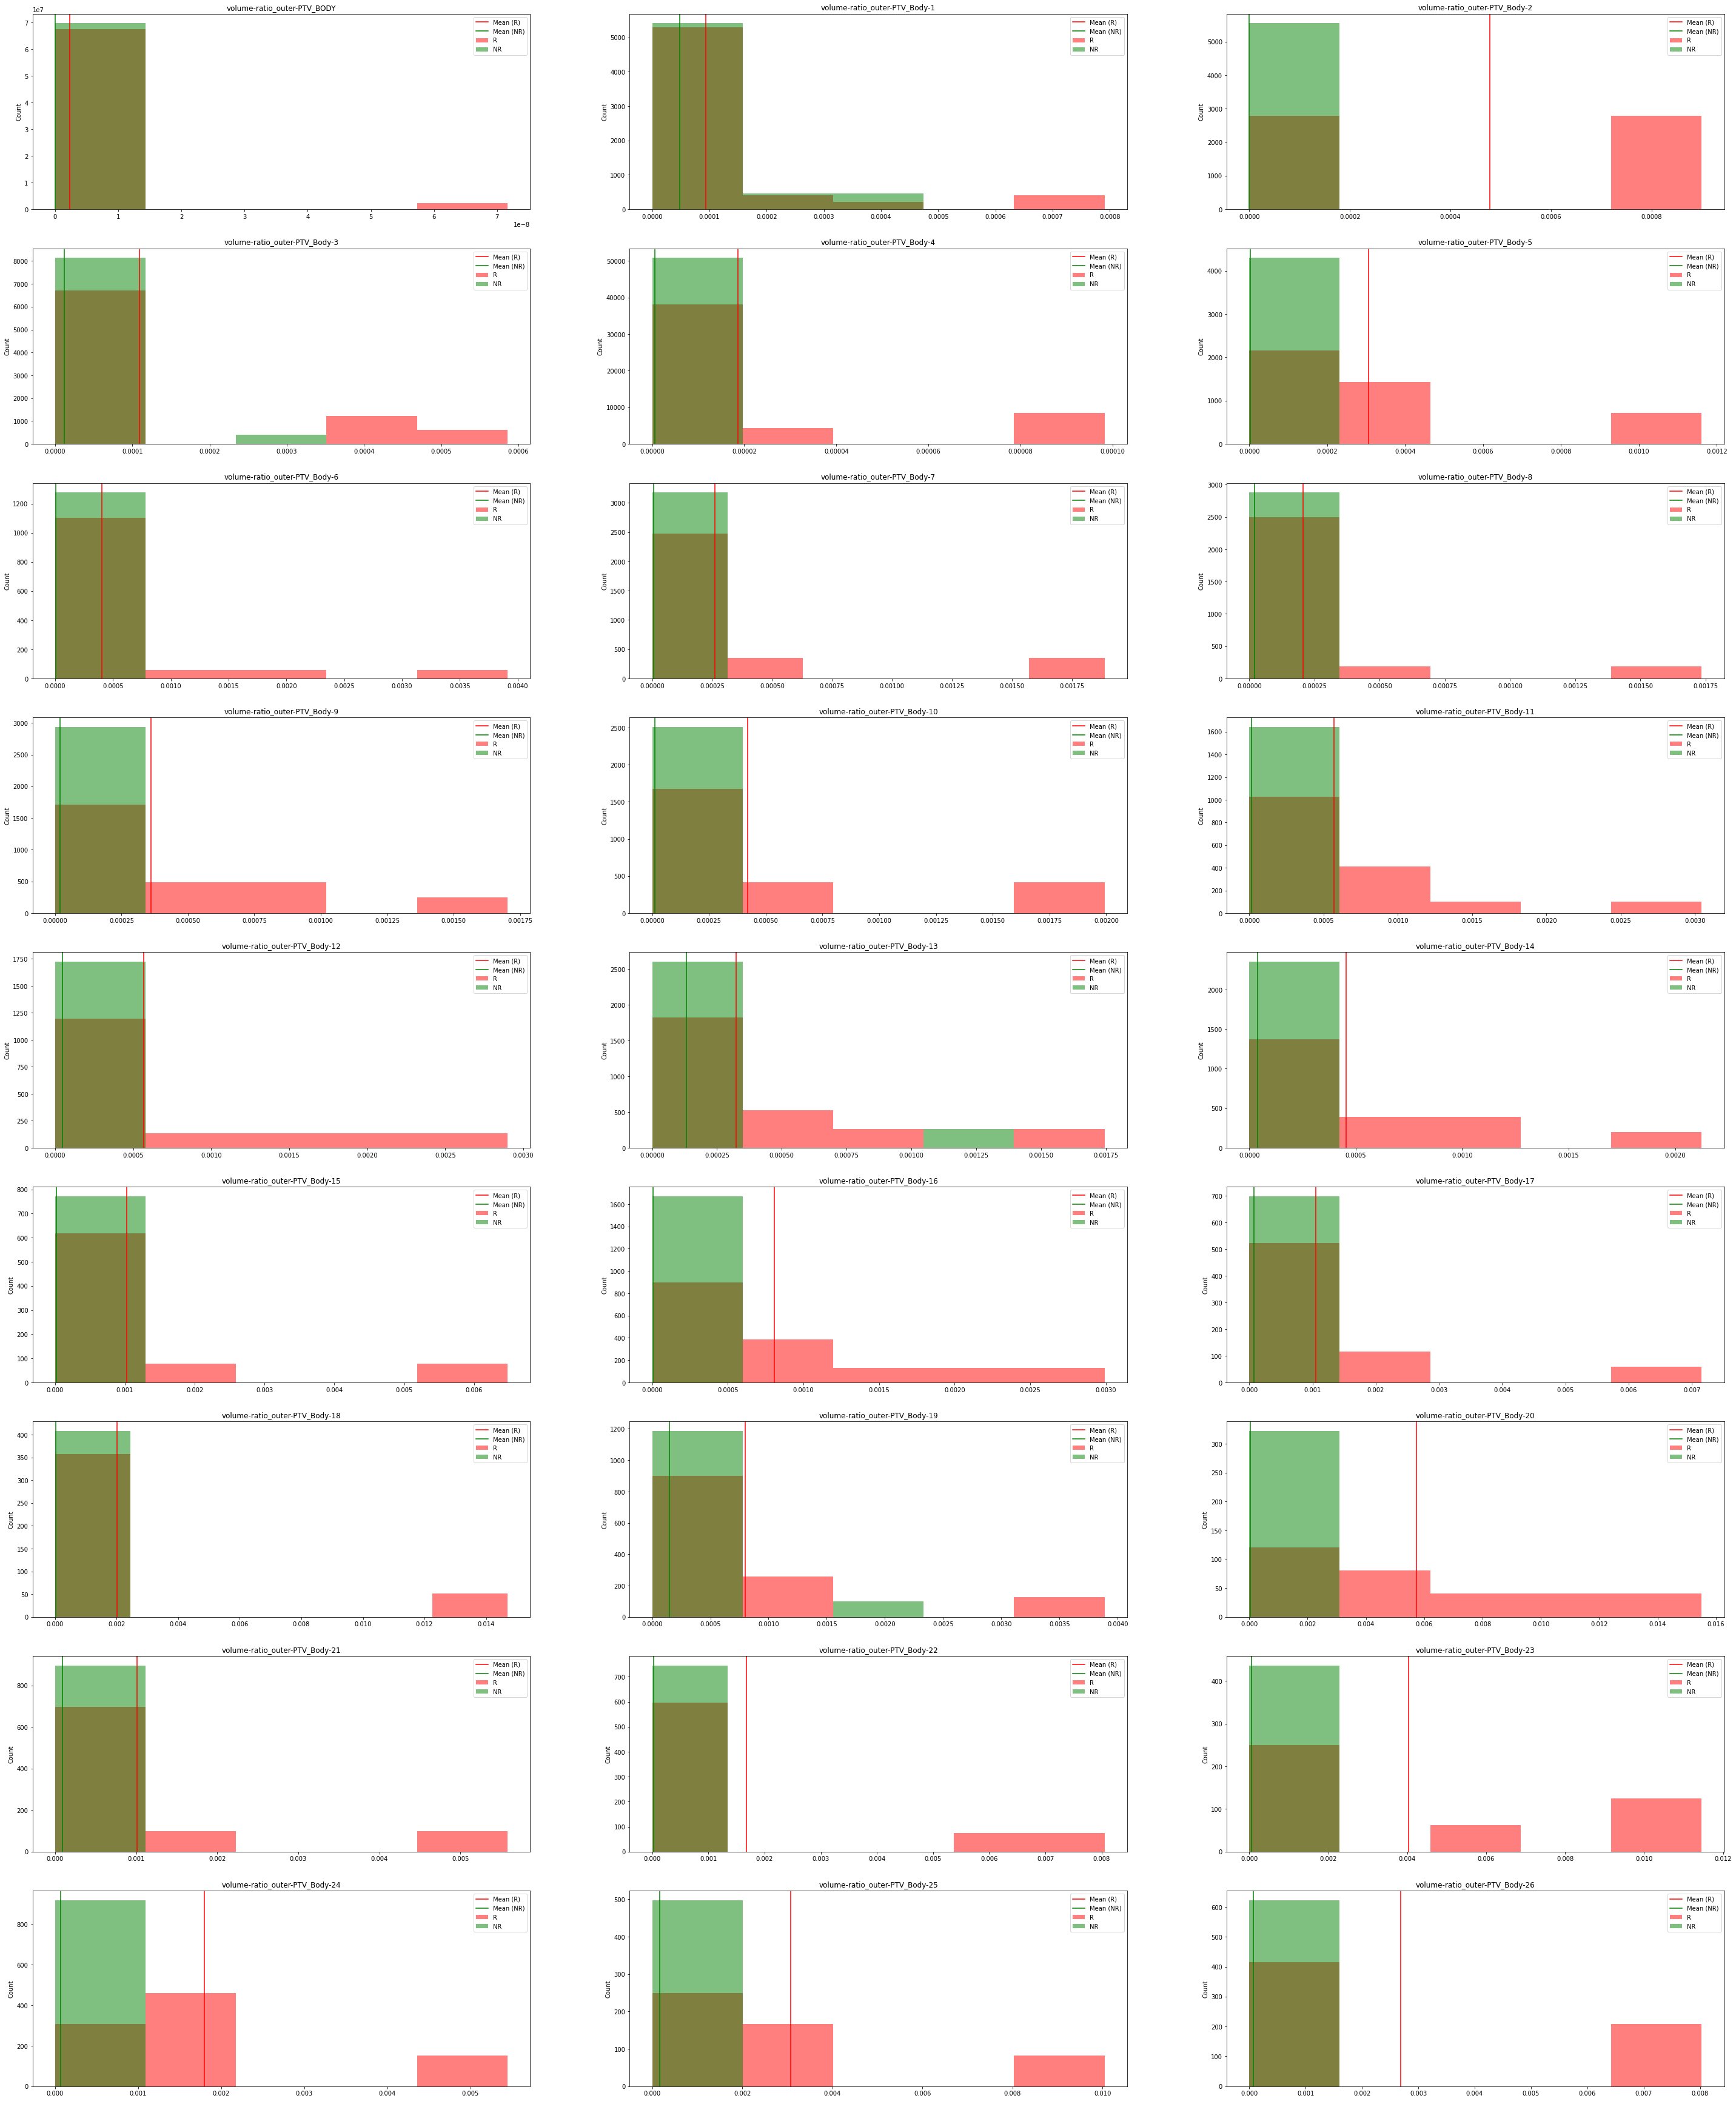

In [ ]:
R = master[master['replanned_or_not']=='R']
NR = master[master['replanned_or_not']=='NR']
plt.figure(figsize = (50,70))
print(Index.iloc[17,0]+": "+Index.iloc[17,1])
for i in enumerate(cols[281:308]):
  if R[i[1]].dtype == 'object':
    continue
  data = pd.concat([R[i[1]].dropna(), NR[i[1]].dropna()])
  data_min, data_max = min(data), max(data)
  xlim = (data_min, data_max)
  width = (data_max - data_min)/5
  bins = np.arange(xlim[0],xlim[-1]+width,float(width))
  plt.subplot(((len(cols[281:308])/3)+1),3,i[0]+1)
  plt.hist(R[i[1]].dropna() , color='red', bins =bins, label='R', alpha=0.5, density=True)
  plt.hist(NR[i[1]].dropna() , color='green', bins =bins, label='NR', alpha=0.5, density=True)
  plt.title(f"{i[1]}")
  plt.axvline(R[i[1]].mean(),color="red",label = 'Mean (R)')
  plt.axvline(NR[i[1]].mean(),color="green",label = 'Mean (NR)')
  plt.ylabel("Count")
  plt.legend()

volume-ratio_outer-PTV_slope: Rate of change of volume-ratio_outer-PTV over time.


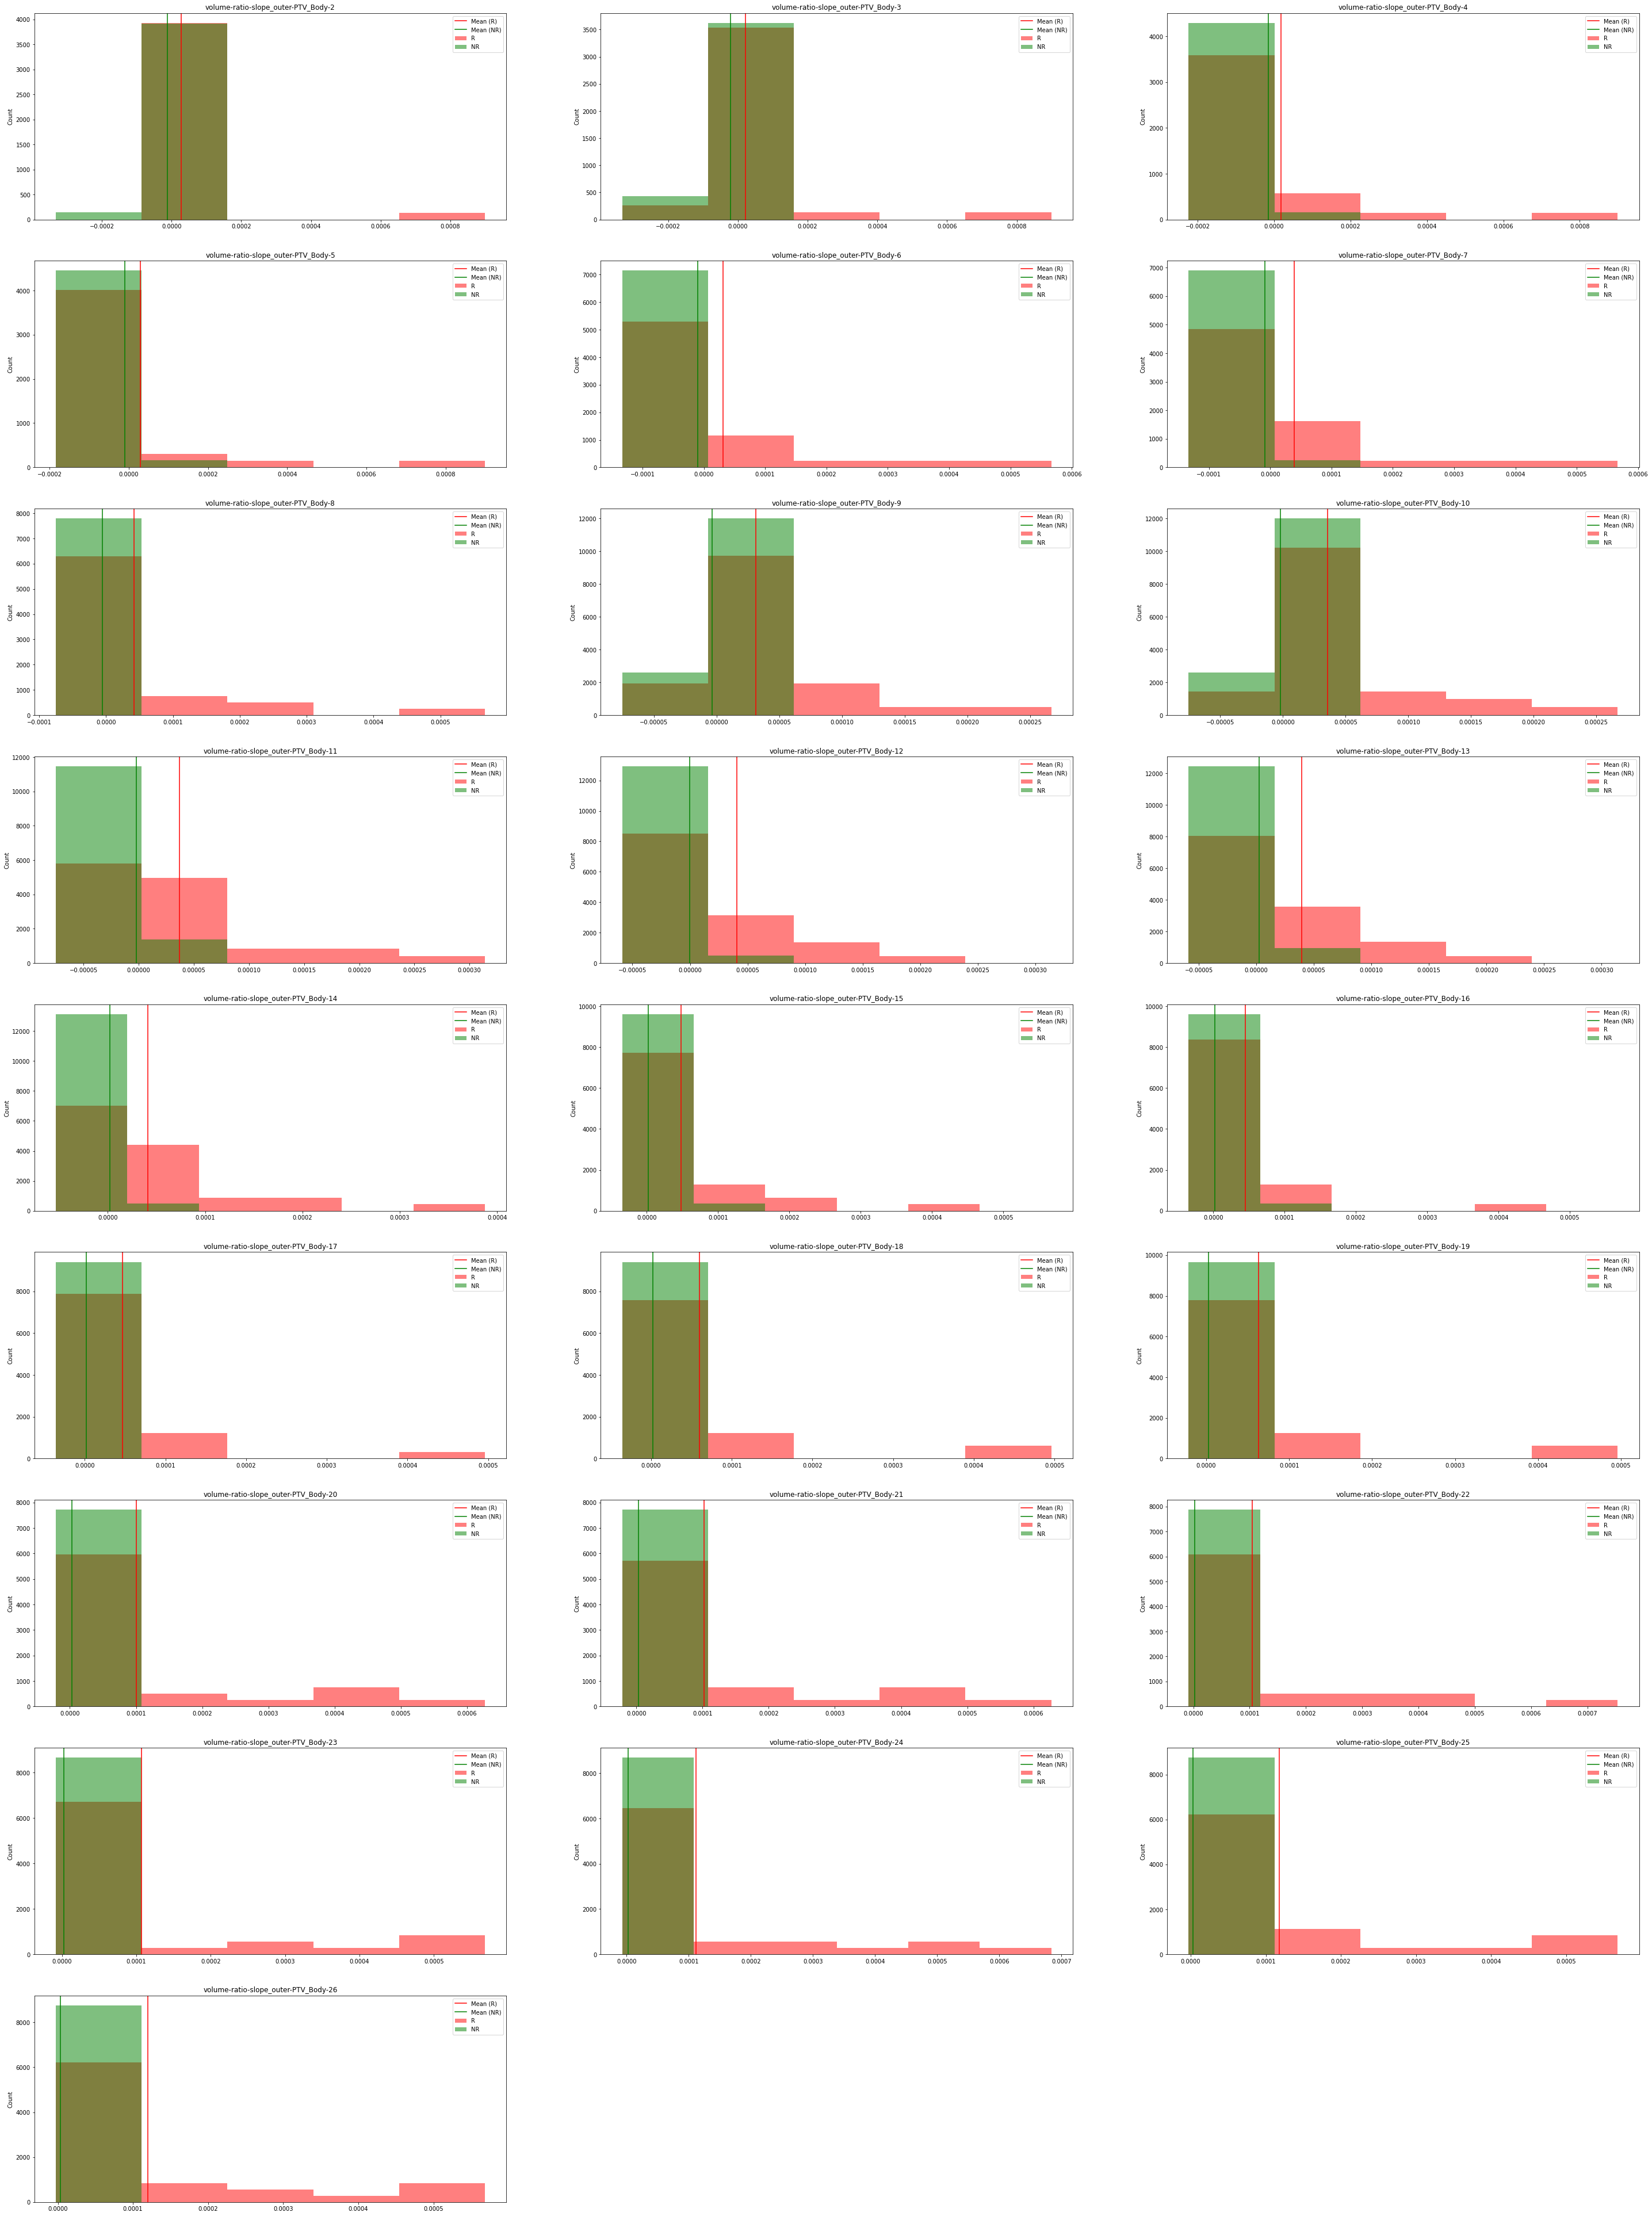

In [ ]:
R = master[master['replanned_or_not']=='R']
NR = master[master['replanned_or_not']=='NR']
plt.figure(figsize = (50,70))
print(Index.iloc[18,0]+": "+Index.iloc[18,1])
for i in enumerate(cols[308:333]):
  if R[i[1]].dtype == 'object':
    continue
  data = pd.concat([R[i[1]].dropna(), NR[i[1]].dropna()])
  data_min, data_max = min(data), max(data)
  xlim = (data_min, data_max)
  width = (data_max - data_min)/5
  bins = np.arange(xlim[0],xlim[-1]+width,float(width))
  plt.subplot(((len(cols[308:333])/3)+1),3,i[0]+1)
  plt.hist(R[i[1]].dropna() , color='red', bins =bins, label='R', alpha=0.5, density=True)
  plt.hist(NR[i[1]].dropna() , color='green', bins =bins, label='NR', alpha=0.5, density=True)
  plt.title(f"{i[1]}")
  plt.axvline(R[i[1]].mean(),color="red",label = 'Mean (R)')
  plt.axvline(NR[i[1]].mean(),color="green",label = 'Mean (NR)')
  plt.ylabel("Count")
  plt.legend()

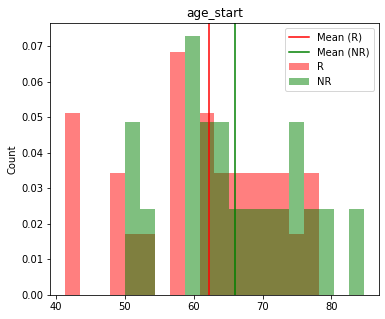

In [ ]:
R = master[master['replanned_or_not']=='R']
NR = master[master['replanned_or_not']=='NR']
plt.figure(figsize = (20,5))
for i in enumerate(cols[334:335]):
  if R[i[1]].dtype == 'object':
    continue
  data = pd.concat([R[i[1]].dropna(), NR[i[1]].dropna()])
  data_min, data_max = min(data), max(data)
  xlim = (data_min, data_max)
  width = (data_max - data_min)/20
  bins = np.arange(xlim[0],xlim[-1]+width,float(width))
  plt.subplot(((len(cols[334:335])/3)+1),3,i[0]+1)
  plt.hist(R[i[1]].dropna() , color='red', bins =bins, label='R', alpha=0.5, density=True)
  plt.hist(NR[i[1]].dropna() , color='green', bins =bins, label='NR', alpha=0.5, density=True)
  plt.title(f"{i[1]}")
  plt.axvline(R[i[1]].mean(),color="red",label = 'Mean (R)')
  plt.axvline(NR[i[1]].mean(),color="green",label = 'Mean (NR)')
  plt.ylabel("Count")
  plt.legend()

weights: Initial and final weight of patient along with weight at each fraction relative to the initial value.


/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


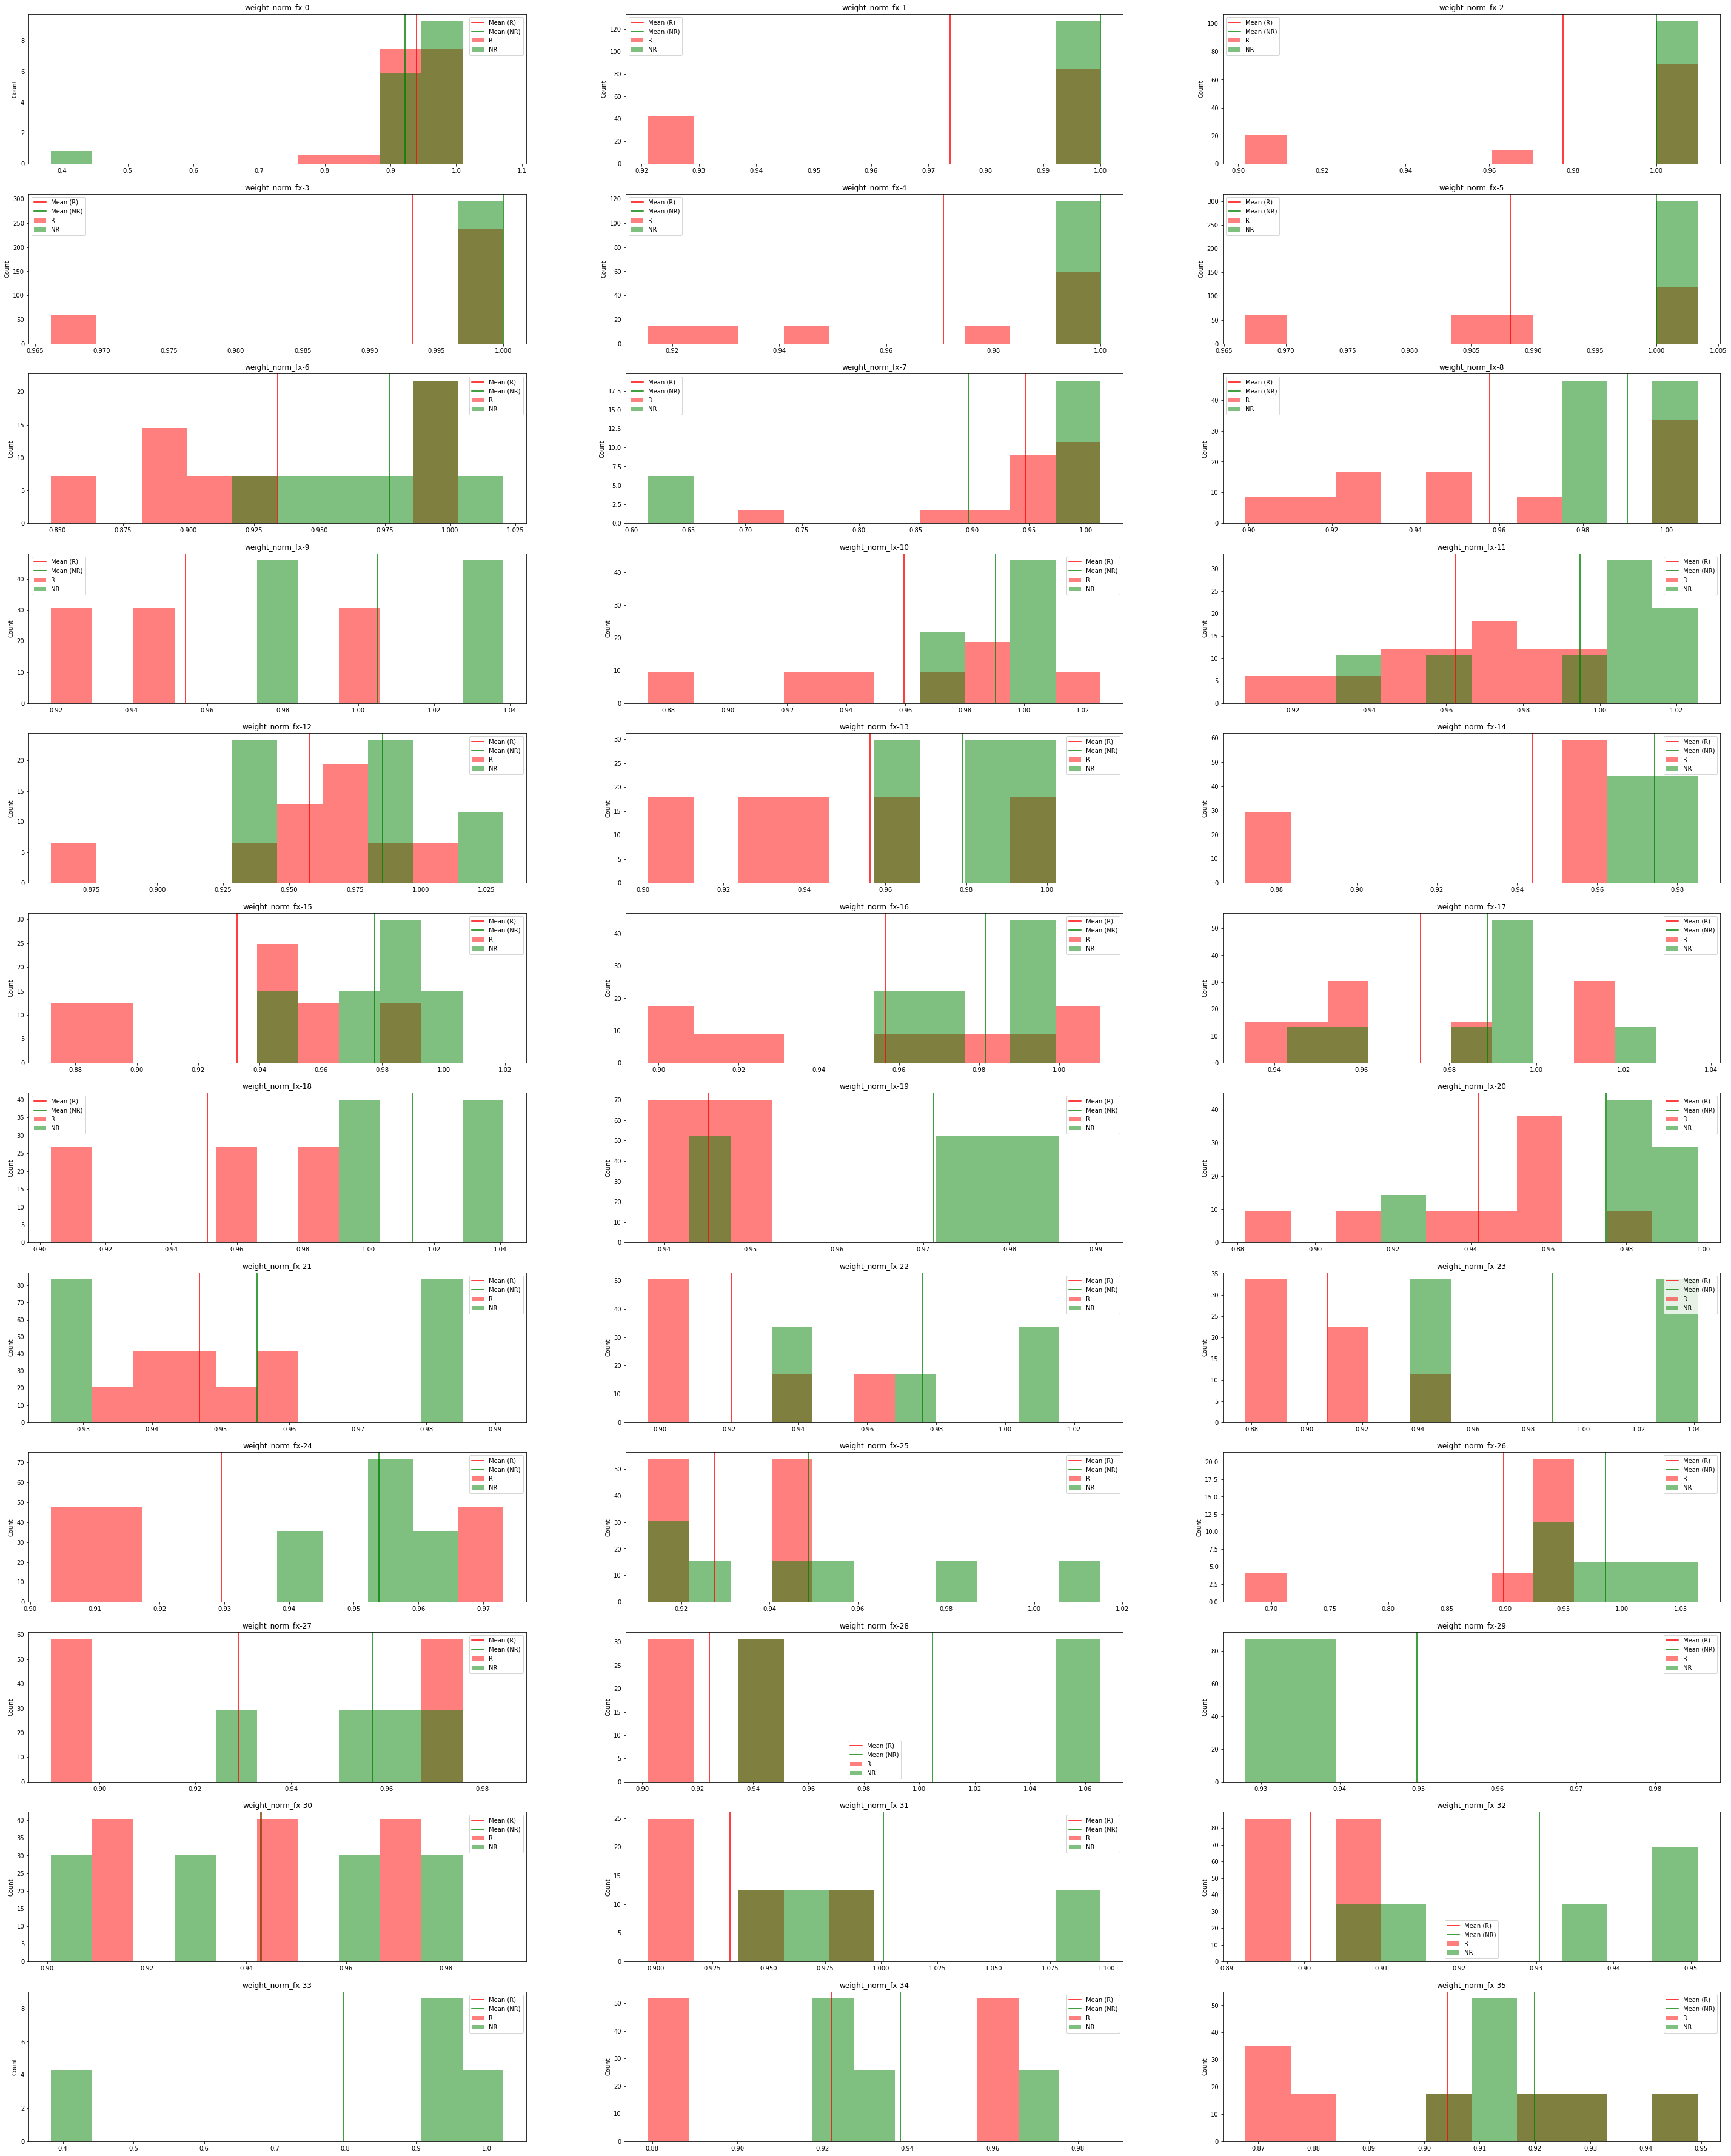

In [ ]:
R = master[master['replanned_or_not']=='R']
NR = master[master['replanned_or_not']=='NR']
plt.figure(figsize = (50,70))
print(Index.iloc[21,0]+": "+Index.iloc[21,1])
for i in enumerate(cols[349:385]):
  if R[i[1]].dtype == 'object':
    continue
  data = pd.concat([R[i[1]].dropna(), NR[i[1]].dropna()])
  data_min, data_max = min(data), max(data)
  xlim = (data_min, data_max)
  width = (data_max - data_min)/10
  bins = np.arange(xlim[0],xlim[-1]+width,float(width))
  plt.subplot(((len(cols[349:385])/3)+1),3,i[0]+1)
  plt.hist(R[i[1]].dropna() , color='red', bins =bins, label='R', alpha=0.5, density=True)
  plt.hist(NR[i[1]].dropna() , color='green', bins =bins, label='NR', alpha=0.5, density=True)
  plt.title(f"{i[1]}")
  plt.axvline(R[i[1]].mean(),color="red",label = 'Mean (R)')
  plt.axvline(NR[i[1]].mean(),color="green",label = 'Mean (NR)')
  plt.ylabel("Count")
  plt.legend()

In [ ]:
# List of columns having categorical data
obj_df = master.select_dtypes(include=['object']).copy()
obj_df.head()

,replanned_or_not,sex,cancer_category,diagnosis_id,stage_summary,T,N,M,chemo
patient_num,,,,,,,,,
19,R,Male,Oropharyngeal cancer,C01,IVA,T4,N2c,M0,Chemo
35,R,Female,Oropharyngeal cancer,C09.9,IVA,T4,N2c,M0,Chemo
115,R,Male,Nasopharyngeal Cancer,C11.9,III,T1,N2,M0,Chemo
272,R,Male,Oropharyngeal cancer,C01,X,T2,N2b,M0,Chemo
447,R,Male,Oropharyngeal cancer,C01,X,T2,N3,MX,Chemo


In [ ]:
# how to fill null values
#    --> Use most common category
#    ---> Drop the column
#    ---> bfill
#    ---> ffill
for col in obj_df.columns:
  print(col)
  print(obj_df[col].value_counts())
  print(master[master[col].isnull()].index.tolist())
  print(f'Sum of NAN: {obj_df[col].isna().sum()}')
print(obj_df.columns)

replanned_or_not
R     31
NR    28
Name: replanned_or_not, dtype: int64
[]
Sum of NAN: 0
sex
Male                35
Female              12
Name: sex, dtype: int64
[490, 520, 506, 425, 509, 504, 440, 503, 510, 498, 514, 515]
Sum of NAN: 12
cancer_category
Oropharyngeal cancer     30
Laryngeal Cancer          7
Nasopharyngeal Cancer     5
Oral cavity cancer        2
Other                     2
Nasal Cavity              1
Name: cancer_category, dtype: int64
[490, 520, 506, 425, 509, 504, 440, 503, 510, 498, 514, 515]
Sum of NAN: 12
diagnosis_id
C01      11
C09.9    10
C10.9     7
C11.9     5
C32.0     4
C02.9     2
C32.9     2
C05.9     1
C09.1     1
C32.8     1
C05.1     1
C14.0     1
C30.0     1
Name: diagnosis_id, dtype: int64
[490, 520, 506, 425, 509, 504, 440, 503, 510, 498, 514, 515]
Sum of NAN: 12
stage_summary
X          23
IVA         9
III         8
IVC         3
IVB         2
Unknown     1
II          1
Name: stage_summary, dtype: int64
[490, 520, 506, 425, 509, 504, 440, 503, 

In [ ]:
for col in master.columns:
  if master[col].isna().sum() > 0:
    print(f"{col} {master[col].dtype}: {master[col].isna().sum()}" )

sex object: 12
age_start float64: 12
cancer_category object: 12
cancer_category_id float64: 12
diagnosis_id object: 12
stage_summary object: 12
T object: 12
N object: 12
M object: 12
chemo object: 12
num_chemo float64: 12
first_weight_kg float64: 9
total_weight-loss_kg float64: 9
weight_norm_fx-0 float64: 12


In [ ]:
# Filled NaN with median
master['age_start'].fillna(master['age_start'].median,inplace=True)
master['age_start'].isna().sum()

0

In [ ]:
# Filled Nan with mode
print(master['cancer_category_id'].value_counts())
master['cancer_category_id'].fillna(master['cancer_category_id'].mode()[0],inplace=True)
print(master['cancer_category_id'].isna().sum())

2.0    30
5.0     7
4.0     5
1.0     2
9.0     2
6.0     1
Name: cancer_category_id, dtype: int64
0


In [ ]:
# Filled Nan with median
print(master['num_chemo'].value_counts())
master['num_chemo'].fillna(master['num_chemo'].median,inplace=True)
print(master['num_chemo'].isna().sum())

3.0    18
7.0     9
0.0     6
5.0     4
4.0     3
8.0     2
2.0     2
6.0     2
9.0     1
Name: num_chemo, dtype: int64
0


In [ ]:
# Filled NaN with median
master['first_weight_kg'].fillna(master['first_weight_kg'].median,inplace=True)
master['first_weight_kg'].isna().sum()

0

In [ ]:
# Filled NaN with median
master['total_weight-loss_kg'].fillna(master['total_weight-loss_kg'].median,inplace=True)
master['total_weight-loss_kg'].isna().sum()

0

In [ ]:
# Filled NaN with median
master['weight_norm_fx-0'].fillna(master['weight_norm_fx-0'].median,inplace=True)
master['weight_norm_fx-0'].isna().sum()

0

In [ ]:
# filling categorical variables with mode
for col in master.columns:
  if master[col].isna().sum() > 0:
    print(f"{col} {master[col].dtype}: {master[col].isna().sum()}" )
    master[col].fillna(master[col].mode()[0],inplace=True)
    print(f"{col} {master[col].dtype}: {master[col].isna().sum()}" )

sex object: 12
sex object: 0
cancer_category object: 12
cancer_category object: 0
diagnosis_id object: 12
diagnosis_id object: 0
stage_summary object: 12
stage_summary object: 0
T object: 12
T object: 0
N object: 12
N object: 0
M object: 12
M object: 0
chemo object: 12
chemo object: 0


In [ ]:
cols = master.columns.tolist()
len(cols)

217

In [ ]:
# Label Encoding for R and NR and deleting excess columsn
master["replanned_or_not"] = master["replanned_or_not"].astype('category')
master["replanned_or_not"] = master["replanned_or_not"].cat.codes
result = pd.DataFrame()
result['replanned_or_not'] = master.iloc[:,0]
master.shape
result

,replanned_or_not
patient_num,
19,1
35,1
115,1
272,1
447,1
454,1
459,1
462,1
77,1


In [ ]:
#Label encoding all the object columns
for col in obj_df:
  master[col] = master[col].astype('category')
  master[col] = master[col].cat.codes
master.head()

,replanned_or_not,BODY,Body-1,xmin-slope_Body-1,xmin-slope_Body-2,xmin-slope_Body-3,xmin-slope_Body-4,xmin-slope_Body-5,xmin-slope_Body-6,xmin-slope_Body-7,...,diagnosis_id,stage_summary,T,N,M,chemo,num_chemo,first_weight_kg,total_weight-loss_kg,weight_norm_fx-0
patient_num,,,,,,,,,,,,,,,,,,,,,
19,1,21.484754,20.805747,-5.599176,-5.599176,-5.599176,-5.599176,-5.599176,-0.660966,-0.660966,...,0,2,3,4,0,0,3.0,99.3,12.7895,1.0
35,1,18.636867,21.230902,-3.322000,-3.322000,-0.553786,-0.553786,-0.553786,-0.841991,-0.841991,...,5,2,3,4,0,0,3.0,64.7,10.6646,0.893354
115,1,21.957419,21.883293,-1.557421,-1.557421,-1.557421,-0.319167,-0.319167,-0.202706,-0.202706,...,7,1,0,2,0,0,3.0,69.5,12.518,1.0
272,1,22.138647,20.795968,-6.803470,-6.803470,-6.803470,-6.803470,-6.803470,-0.905675,-0.905675,...,0,6,1,3,0,0,3.0,98.7,10.537,0.89463
447,1,19.842300,21.966858,-4.473957,-4.473957,-4.473957,-0.970603,-1.415517,-1.415517,-1.415517,...,0,6,1,5,2,0,3.0,72.0,4.0278,0.970139


(203, 203)

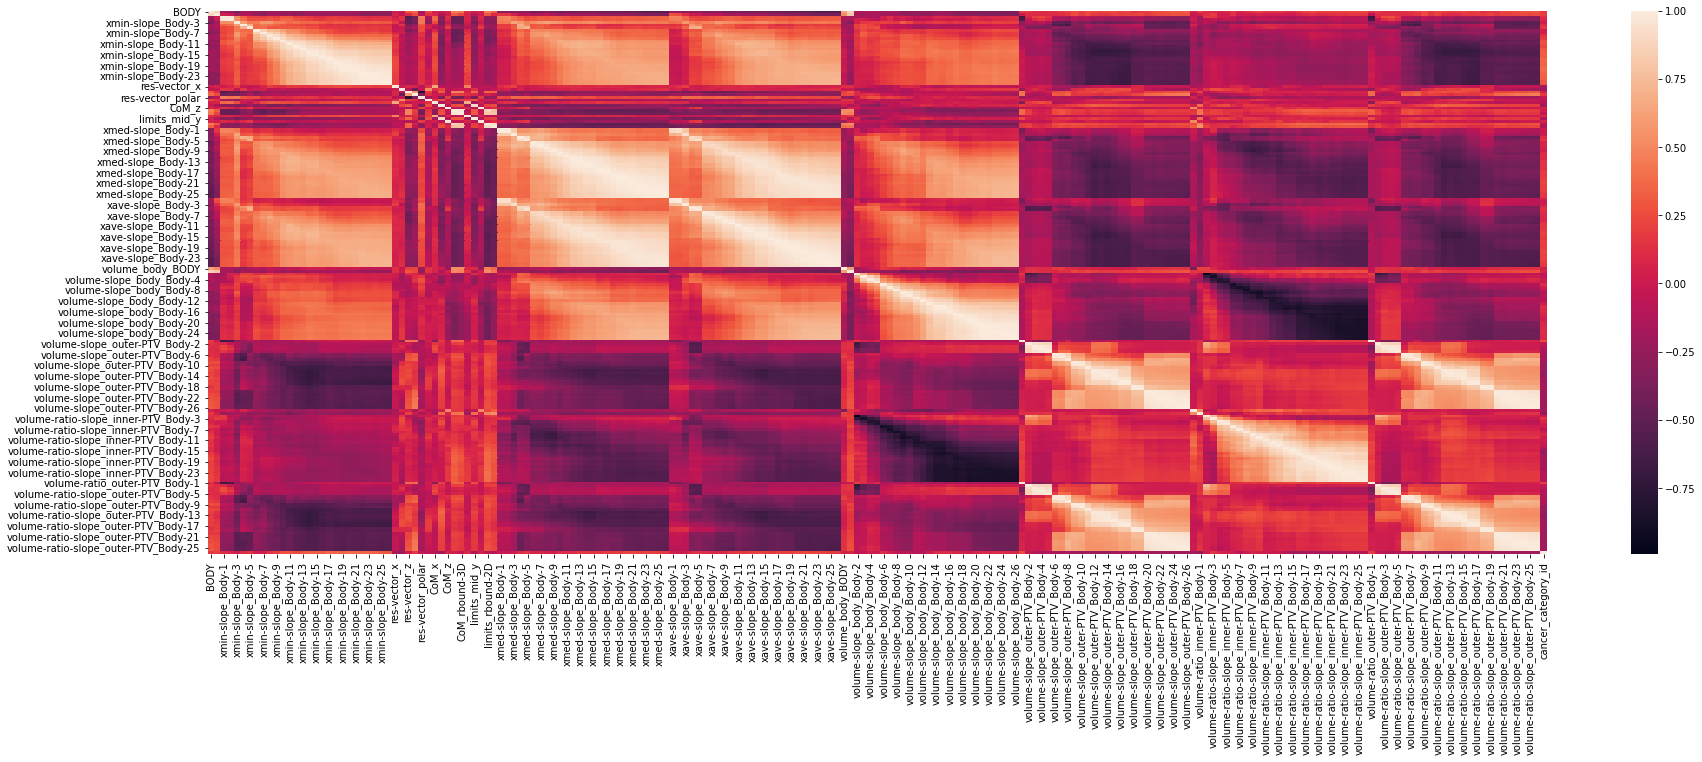

In [ ]:
# Correlation Heatmap
corr = master.corr()
fig, ax = plt.subplots(figsize=(30,10))
sns.heatmap(corr,ax=ax)
corr.shape

In [ ]:
#columns = np.full((corr.shape[0],), True, dtype=bool)
#for i in range(corr.shape[0]):
 #   for j in range(i+1, corr.shape[0]):
  #      if corr.iloc[i,j] >= 0.9:
  #          if columns[j]:
   #             columns[j] = False
#corr

,BODY,Body-1,xmin-slope_Body-1,xmin-slope_Body-2,xmin-slope_Body-3,xmin-slope_Body-4,xmin-slope_Body-5,xmin-slope_Body-6,xmin-slope_Body-7,xmin-slope_Body-8,...,volume-ratio-slope_outer-PTV_Body-18,volume-ratio-slope_outer-PTV_Body-19,volume-ratio-slope_outer-PTV_Body-20,volume-ratio-slope_outer-PTV_Body-21,volume-ratio-slope_outer-PTV_Body-22,volume-ratio-slope_outer-PTV_Body-23,volume-ratio-slope_outer-PTV_Body-24,volume-ratio-slope_outer-PTV_Body-25,volume-ratio-slope_outer-PTV_Body-26,cancer_category_id
BODY,1.000000,0.881941,-0.211892,-0.223743,-0.371394,-0.196135,-0.202545,-0.258519,-0.305868,-0.209986,...,0.132432,0.170365,0.174769,0.222448,0.236327,0.255470,0.275863,0.269290,0.288137,0.172820
Body-1,0.881941,1.000000,0.028196,0.001260,-0.181552,-0.127081,-0.115984,-0.244849,-0.280430,-0.173091,...,0.180728,0.214615,0.164376,0.199084,0.214674,0.228126,0.247828,0.232999,0.246007,0.191662
xmin-slope_Body-1,-0.211892,0.028196,1.000000,0.955051,0.528312,0.348118,0.234939,0.223274,0.210650,0.247309,...,-0.172281,-0.158491,-0.264588,-0.251859,-0.261446,-0.275575,-0.282089,-0.303839,-0.300688,0.117788
xmin-slope_Body-2,-0.223743,0.001260,0.955051,1.000000,0.546009,0.394689,0.264989,0.269595,0.261579,0.306574,...,-0.191181,-0.166376,-0.276990,-0.264573,-0.276137,-0.290610,-0.298429,-0.321292,-0.318269,0.093183
xmin-slope_Body-3,-0.371394,-0.181552,0.528312,0.546009,1.000000,0.606637,0.442689,0.453487,0.567808,0.580737,...,-0.358272,-0.344101,-0.511666,-0.520073,-0.511232,-0.540164,-0.531439,-0.505684,-0.507223,0.029581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
volume-ratio-slope_outer-PTV_Body-23,0.255470,0.228126,-0.275575,-0.290610,-0.540164,-0.527952,-0.481271,-0.264951,-0.342207,-0.414236,...,0.690325,0.704448,0.966221,0.982889,0.991135,1.000000,0.993396,0.979410,0.977973,-0.195105
volume-ratio-slope_outer-PTV_Body-24,0.275863,0.247828,-0.282089,-0.298429,-0.531439,-0.526857,-0.480354,-0.283237,-0.345641,-0.414713,...,0.684893,0.699187,0.958051,0.976083,0.984732,0.993396,1.000000,0.985416,0.983704,-0.186437
volume-ratio-slope_outer-PTV_Body-25,0.269290,0.232999,-0.303839,-0.321292,-0.505684,-0.504680,-0.468214,-0.287103,-0.330776,-0.402632,...,0.676855,0.688534,0.942861,0.959658,0.967619,0.979410,0.985416,1.000000,0.997788,-0.192705
volume-ratio-slope_outer-PTV_Body-26,0.288137,0.246007,-0.300688,-0.318269,-0.507223,-0.499818,-0.467176,-0.290139,-0.335456,-0.404308,...,0.668890,0.681159,0.930561,0.955509,0.963334,0.977973,0.983704,0.997788,1.000000,-0.194111


In [ ]:
## When selecting using correlation
#selected_columns = master.columns[columns]
#print(selected_columns.shape)
#selected_columns

(54,)


Index(['BODY', 'Body-1', 'xmin-slope_Body-1', 'xmin-slope_Body-3',
       'xmin-slope_Body-4', 'xmin-slope_Body-5', 'xmin-slope_Body-6',
       'xmin-slope_Body-7', 'xmin-slope_Body-8', 'xmin-slope_Body-10',
       'res-vector_x', 'res-vector_y', 'res-vector_z', 'res-vector_radial',
       'res-vector_polar', 'res-vector_azimuthal', 'CoM_x', 'CoM_y', 'CoM_z',
       'CoM_rbound-2D', 'limits_mid_x', 'limits_rbound-2D',
       'xmed-slope_Body-1', 'xmed-slope_Body-3', 'xmed-slope_Body-4',
       'xmed-slope_Body-6', 'xave-slope_Body-6', 'volume_body_BODY',
       'volume_body_Body-1', 'volume-slope_body_Body-2',
       'volume-slope_body_Body-3', 'volume-slope_body_Body-4',
       'volume-slope_body_Body-6', 'volume-slope_body_Body-7',
       'volume-slope_body_Body-8', 'volume-slope_body_Body-9',
       'volume_outer-PTV_Body-1', 'volume-slope_outer-PTV_Body-2',
       'volume-slope_outer-PTV_Body-6', 'volume-slope_outer-PTV_Body-9',
       'volume-slope_outer-PTV_Body-11', 'volume-slop